In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tqdm import tqdm_notebook,tqdm
import nucleus as ncl

import d2lzh as d2l
import mxnet
import d2lzh as d2l
from mxnet import gluon, init, nd
from mxnet.gluon import data as gdata, nn
from time import time
import os
import sys

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import nucleus as nuc
from sklearn.model_selection import train_test_split

### 1  获取数据函数

In [51]:
def get_pulse_data(filename):

    fid = open(filename, 'rb')
    pulseheight = []
    realtime = []
    da1 = []
    da2 = []

    fid.seek( 256, 0 )
    data_array0 = np.fromfile(fid, dtype=np.uint32)

    RTword = np.where((data_array0 >= 2**31) & (data_array0 < (2**31 + 2**30)))
    RTwordcounts = RTword[0]
    
    fid.seek( 256, 0 )
    # with pbar.ProgressBar(max_value=RTwordcounts.size) as bar: 
    for i in tqdm_notebook(range(0, RTwordcounts.size)):
        fid.seek(RTwordcounts[i]*4, 1)
        da = np.fromfile(fid, dtype = np.uint16, count = 1)
        realtime10ms = da
        da1.append(da[0])

        fid.seek(14, 1)
        # realtime200ns = []
        while 1:
            # data_array00 = np.fromfile(fid, dtype=np.uint32, count = 1)
            data_array1 = np.fromfile(fid, dtype=np.uint16, count=1)
            data_array2 = np.fromfile(fid, dtype=np.uint16, count=1)

            if data_array2 < 2**15 + 2**14:
                break
            realtime200ns = data_array1[0]
            # da2 = np.hstack((da2, realtime200ns))
            realtime0 = realtime200ns * 200 * 1e-6 + realtime10ms * 10  # ns 换算为ms
            realtime.append(realtime0)
            pulseheight.append(data_array2 - (2 ** 15 + 2 ** 14))
        fid.seek(256, 0)
    pulseheight = np.array(pulseheight)
    pulseheight = pulseheight.T

    realtime = np.array(realtime)
    realtime = realtime.T
    realtimepulse = np.hstack((realtime, pulseheight))
    
    return pulseheight, realtime, realtimepulse

### 2 获取数据文件夹的全部文件名

In [52]:
fileName = listdir('../Cs137data/lis')
fileName, len(fileName)

(['BenDi_10min_02.Lis',
  'Co60_10min_03.Lis',
  'Co60_180s_01.Lis',
  'Co60_180s_02.Lis',
  'Cs137_10min_01.Lis',
  'Cs137_180s_000.Lis',
  'Cs137_180s_001.Lis',
  'Cs137_180s_s1.Lis',
  'CsCo_10min_01.Lis',
  'Eu155_10min_01.Lis'],
 10)

### 3 获取数据

In [53]:
pulseCs137, realtimeCs137, pulsetimeCs137 = get_pulse_data('../Cs137data/lis/' + fileName[4])

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000129102838B8>
Traceback (most recent call last):
  File "e:\anaconda\envs\deeplearning\lib\weakref.py", line 359, in remove
    self = selfref()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [143]:
pulseCo, realtimeCo, pulsetimeCo = get_pulse_data('../Cs137data/lis/' + fileName[1])

In [144]:
pulseEu155_Na22, realtimeEu155_Na22, pulsetimeEu155_Na22 = get_pulse_data('../Cs137data/lis/' + fileName[9])

In [145]:
pulseBq, realtimeBq, pulsetimeBq = get_pulse_data('../Cs137data/lis/' + fileName[0])

In [146]:
pulseCo60_Cs137, realtimeCo60_Cs137, pulsetimeCo60_Cs137 = get_pulse_data('../Cs137data/lis/' + fileName[8])

In [62]:
keyValue = {'BenDi': 0, 'Cs137': 1, 'CsGo': 2, 'Cs': 1, 'Co60': 3, 'Eu155': 4}

In [90]:
start  = time()    
timeData = np.zeros((1, 5000))
pulseData = np.zeros((1, 5000))
nuc_index = []
for i in range(len(fileName)):
    fileaddress = '../Cs137data/lis/' + fileName[0]
    pulse, realtime, pr = get_pulse_data(fileaddress)
    
    pulse_1 = np.zeros((realtime.shape[1]//5000, 5000))
    time_1 = np.zeros((realtime.shape[1]//5000, 5000))

    for j in range(realtime.shape[1] // 5000):
        time_1[i] = realtime[0, j * 5000 : j * 5000 + 5000]
        pulse_1[i] = pulse[0, j * 5000 : j * 5000 + 5000]
        nuc_index.append(keyValue[fileName[0].split('_')[0]])
    print( 'i = %d, len = %d, nuc is %s' % (i, len(timeData), fileName[i].split('_')[0]), end='  ' )
    break
print('\n time is :%d:%d' % ((time() - start) // 60, (time() - start) % 60))


i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, len = 1, nuc is BenDi  i = 0, le

In [212]:
start = time()
dataSet = np.zeros((pulseCs137.shape[1]//2500 + pulseCo.shape[1]//2500, 50, 50, 2))
labels = np.zeros((pulseCs137.shape[1]//2500 + pulseCo.shape[1]//2500, 1))
for i in range(pulseCs137.shape[1]//2500):
    labels[i, 0] = 0 
    for j in range(50):
        dataSet[i, j, :, 0] = pulseCs137[0, i * 2500 + j * 50 : i * 2500 + j * 50 + 50]
        dataSet[i, j, :, 1] = realtimeCs137[0, i * 2500 + j * 50 : i * 2500 + j * 50 + 50]
for i in range(pulseCo.shape[1]//2500):
    labels[i + pulseCs137.shape[1]//2500, 0] = 1 
    for j in range(50):
        dataSet[(i + pulseCs137.shape[1]//2500), j, :, 0] = pulseCo[0, i * 2500 + j * 50 : i * 2500 + j * 50 + 50]
        dataSet[(i + pulseCs137.shape[1]//2500), j, :, 1] = realtimeCo[0, i * 2500 + j * 50 : i * 2500 + j * 50 + 50]
print(time() - start)

1.1778485774993896


In [213]:
np.where(dataSet[:, :, :, 1] > 65530)[1]

array([38, 38, 38, ..., 49, 49, 49], dtype=int64)

In [214]:
dataSet.shape

(6409, 50, 50, 2)

In [215]:
index = []
for i in range(dataSet.shape[0]):
    if np.max(dataSet[i, :, :, 1]) - np.min(dataSet[i, :, :, 1]) > 60000:
        index.append(i)
index

[192,
 385,
 577,
 767,
 958,
 1150,
 1342,
 1534,
 1725,
 1917,
 2110,
 2483,
 2680,
 2877,
 3074,
 3272,
 3469,
 3667,
 3862,
 4052,
 4246,
 4439,
 4632,
 4820,
 5014,
 5207,
 5401,
 5592,
 5785,
 5975,
 6166,
 6357]

In [216]:
labels = np.delete(labels, index[:], 0)

In [217]:
dataSet = np.delete(dataSet, index[:], 0)

In [218]:
dataSet.shape

(6377, 50, 50, 2)

In [219]:
# first_data = dataSet[0, 0, 0, 1]
for i in tqdm_notebook(range(dataSet.shape[0])):
    first_data = int(dataSet[i, 0, 0, 1])
    for j in range(50):
        for k in range(50):
            if dataSet[i, j, k, 1] - first_data > 0 or dataSet[i, j, k, 1] - first_data == 0: 
                dataSet[i, j, k, 1] = dataSet[i, j, k, 1] - first_data
            else:
                print(dataSet[i, j, k, 1])
                dataSet[i, j, k, 1] = 0
           

52660.0
6782.0
4030.0
6550.0
59000.0
53842.0
26950.0
34950.0
12462.0
57042.0
3074.0
47418.0



In [220]:
for i in range(dataSet.shape[0]):
    if np.max(dataSet[i, :, :, 1]) > 1000:
        print(i, np.max(dataSet[i, :, :, 1]), end=' ' )


In [221]:
dataSet[155, :, :, 1]

array([[3.110000e-01, 3.376000e-01, 5.282000e-01, ..., 7.199000e+00,
        7.224200e+00, 7.402600e+00],
       [7.427400e+00, 7.650200e+00, 7.675600e+00, ..., 1.201040e+01,
        1.203680e+01, 1.268220e+01],
       [1.271000e+01, 1.305760e+01, 1.308360e+01, ..., 1.880180e+01,
        1.915240e+01, 1.918020e+01],
       ...,
       [3.146138e+02, 3.146366e+02, 3.150290e+02, ..., 3.201212e+02,
        3.202828e+02, 3.205352e+02],
       [3.205624e+02, 3.206480e+02, 3.207494e+02, ..., 3.262444e+02,
        3.270750e+02, 3.271026e+02],
       [3.273770e+02, 3.274014e+02, 3.274724e+02, ..., 3.332008e+02,
        3.332278e+02, 3.335682e+02]])

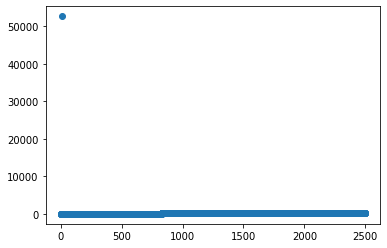

In [187]:
a = dataSet[155, :, :, 1].reshape(1, 2500)
plt.scatter(range(2500), a)
plt.show()

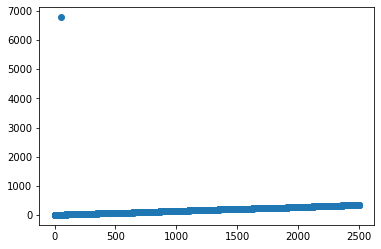

In [188]:
a = dataSet[594 , :, :, 1].reshape(1, 2500)
plt.scatter(range(2500), a)
plt.show()

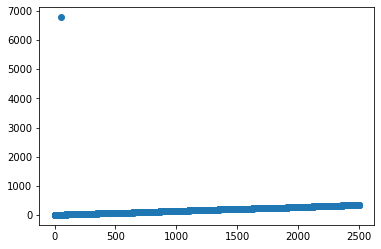

In [189]:
a = dataSet[594 , :, :, 1].reshape(1, 2500)
plt.scatter(range(2500), a)
plt.show(965 )

In [107]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

 29335552/170498071 [====>.........................] - ETA: 1:48:1 - ETA: 1:03:1 - ETA: 42:28  - ETA: 28:4 - ETA: 17:0 - ETA: 13:3 - ETA: 13:5 - ETA: 10:1 - ETA: 11:1 - ETA: 9:4 - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 5: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - 

In [108]:
train_images.shape

(50000, 32, 32, 3)

### 4 处理数据

In [173]:
pulsedataSet = pd.read_csv('../Cs137data/csv/pulse2525.csv')
realtimedataSet = pd.read_csv('../Cs137data/csv/realtime2525.csv')
pulsedataSet.shape, realtimedataSet.shape

((11135, 2502), (11135, 2501))

In [174]:
pulsedataSet

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0,23.0,114.0,114.0,117.0,116.0,36.0,35.0,28.0,25.0,...,38.0,28.0,24.0,115.0,116.0,30.0,29.0,66.0,65.0,0.0
1,1,109.0,112.0,122.0,123.0,30.0,39.0,40.0,108.0,105.0,...,25.0,24.0,38.0,39.0,112.0,114.0,80.0,79.0,20.0,0.0
2,2,21.0,22.0,20.0,56.0,110.0,109.0,116.0,116.0,38.0,...,56.0,112.0,112.0,113.0,115.0,114.0,113.0,117.0,120.0,0.0
3,3,54.0,55.0,35.0,32.0,59.0,58.0,73.0,75.0,24.0,...,39.0,69.0,69.0,41.0,41.0,110.0,112.0,207.0,202.0,0.0
4,4,33.0,34.0,20.0,110.0,109.0,21.0,23.0,53.0,53.0,...,33.0,115.0,25.0,23.0,112.0,113.0,108.0,109.0,108.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,11130,25.0,23.0,20.0,23.0,16.0,15.0,27.0,30.0,35.0,...,219.0,18.0,19.0,19.0,39.0,38.0,36.0,37.0,36.0,3.0
11131,11131,73.0,72.0,38.0,36.0,18.0,18.0,17.0,18.0,20.0,...,181.0,181.0,94.0,93.0,18.0,18.0,42.0,41.0,48.0,3.0
11132,11132,50.0,34.0,35.0,16.0,17.0,41.0,42.0,64.0,64.0,...,44.0,46.0,96.0,97.0,62.0,63.0,19.0,19.0,35.0,3.0
11133,11133,37.0,19.0,17.0,35.0,21.0,25.0,34.0,34.0,51.0,...,17.0,76.0,75.0,28.0,27.0,171.0,172.0,87.0,88.0,3.0


In [175]:
realtimedataSet

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0.0220,0.1208,0.1460,0.1740,0.1986,0.6814,0.7060,0.8740,1.0720,...,321.7622,321.7886,321.9280,321.9544,323.0024,323.0290,323.1992,323.2262,323.5290,323.5540
1,1,323.5892,323.6136,323.6346,323.6582,323.7582,323.9508,323.9758,324.0214,324.0476,...,670.7084,671.1250,671.1500,671.3912,671.4160,671.5562,671.5828,671.7618,671.7884,672.3882
2,2,672.4158,673.4258,673.4524,673.5314,673.6350,673.6606,673.9064,673.9328,674.1066,...,1018.2674,1018.2946,1018.3874,1018.4134,1018.7042,1018.7306,1018.7686,1018.7938,1018.9022,1018.9280
3,3,1019.1612,1019.1862,1019.6476,1019.6730,1019.7700,1019.7962,1020.5138,1020.5394,1020.6956,...,1357.7292,1357.7554,1358.1994,1358.2256,1358.6246,1358.6504,1359.1626,1359.1886,1359.3802,1359.4048
4,4,1359.5428,1359.5694,1359.8832,1360.1066,1360.1322,1360.1530,1360.1770,1360.4792,1360.5044,...,1680.7774,1680.8038,1680.8694,1681.4416,1681.4666,1681.4864,1681.5142,1681.5754,1681.6510,1681.6762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,11130,21299.0818,21299.1072,21299.5854,21299.6116,21301.1124,21301.1402,21302.1564,21302.1824,21302.4806,...,23206.6454,23206.6710,23206.7648,23206.7922,23207.6020,23208.4856,23210.5802,23210.6062,23212.1132,23212.1392
11131,11131,23213.2654,23213.2906,23213.4462,23213.4722,23213.8386,23213.8650,23215.1242,23215.1514,23215.8802,...,25232.0726,25234.0622,25234.0866,25235.1106,25235.1378,25235.4720,25235.4978,25235.7932,25235.8196,25238.5198
11132,11132,25238.5458,25239.9602,25239.9870,25241.5098,25241.5360,25243.0870,25243.1122,25244.6904,25244.7152,...,27156.1792,27156.7932,27156.8202,27158.1824,27158.2068,27158.9064,27158.9312,27160.1832,27160.2092,27161.2874
11133,11133,27161.3136,27161.5862,27161.6112,27162.2104,27167.9958,27168.0218,27173.8528,27173.8786,27174.0216,...,29121.9866,29122.0140,29122.5288,29122.5548,29123.9612,29123.9876,29128.4714,29128.4982,29128.8862,29128.9120


In [176]:
pulsedataSet = pulsedataSet.values
realtimedataSet = realtimedataSet.values
pulsedataSet.shape, realtimedataSet.shape

((11135, 2502), (11135, 2501))

In [177]:
pulsedataSet = pulsedataSet[:, 1: 2502]
realtimedataSet = realtimedataSet[:, 1: 2501]
pulsedataSet.shape, realtimedataSet.shape

((11135, 2501), (11135, 2500))

In [178]:
rng = np.random.RandomState(2)
indices = np.arange(pulsedataSet.shape[0])
rng.shuffle(indices)
indices.max(), indices

(11134, array([ 616, 8925,  727, ..., 6637, 2575, 7336]))

In [179]:
labels = pulsedataSet[indices, -1]
pulseSet = pulsedataSet[indices, :2500]
realSet = realtimedataSet[indices, :]
pulseSet.shape, realSet.shape

((11135, 2500), (11135, 2500))

In [180]:
index1 = []
for i in range(realSet.shape[0]):
    if np.max(realSet[i, :]) - np.min(realSet[i, :]) > 50000:
        index1.append(i)
index1

[126,
 298,
 647,
 832,
 1008,
 1196,
 1353,
 1406,
 1483,
 1589,
 1921,
 2120,
 2308,
 2436,
 2758,
 2818,
 2891,
 2999,
 3196,
 3774,
 3980,
 4220,
 4235,
 4398,
 4641,
 4706,
 4825,
 5073,
 5089,
 5184,
 5226,
 5238,
 5497,
 5809,
 5862,
 5902,
 5919,
 7161,
 7291,
 7296,
 7434,
 7578,
 7668,
 7784,
 7908,
 8235,
 8551,
 8553,
 8582,
 8619,
 8628,
 8740,
 9346,
 9566,
 9612,
 9933,
 10011,
 10325,
 10597,
 10657,
 10686,
 11001]

In [181]:
pulseSet = np.delete(pulseSet, index1, 0)
realSet = np.delete(realSet, index1, 0)

pulseSet.shape, realSet.shape

((11073, 2500), (11073, 2500))

In [182]:
labels = np.delete(labels, index1, 0)
labels, labels.shape

(array([0., 2., 0., ..., 2., 1., 2.]), (11073,))

In [183]:
index2 = []
for i in range(realSet.shape[0]):
    realSet[i, :] = realSet[i, :] - realSet[i, 0]
    if np.min(realSet[i, :]) < 0:
        index2.append(i)
len(index2)

19

In [184]:
pulseSet = np.delete(pulseSet, index2, 0)
realSet = np.delete(realSet, index2, 0)
labels = np.delete(labels, index2, 0)

pulseSet.shape, realSet.shape, labels, labels.shape

((11054, 2500), (11054, 2500), array([0., 2., 0., ..., 2., 1., 2.]), (11054,))

In [186]:
dataSet = np.zeros((pulseSet.shape[0], 50, 50, 2))
for i in range(pulseSet.shape[0]):
    for j in range(50):
        dataSet[i, j, :, 0] = pulseSet[i, j * 50: j * 50 + 50]
        dataSet[i, j, :, 1] = realSet[i, j * 50: j * 50 + 50]
dataSet.shape

(11054, 50, 50, 2)

In [188]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / np.max(dataSet[:, :, :, 0])
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / np.max(dataSet[:, :, :, 1])

trainData = dataSet[:7000, :, :, :]
testData = dataSet[7000:, :, :, :]
trainLabels = labels[:7000]
testLabels = labels[7000:]
trainData.shape, testData.shape, trainLabels.shape, testLabels.shape

((7000, 50, 50, 2), (4054, 50, 50, 2), (7000,), (4054,))

In [190]:
lb = labels[index2]
lb.shape

(19,)

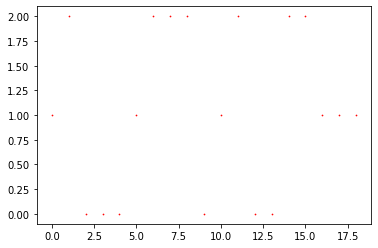

In [191]:
plt.scatter(range(len(index2)), lb, s=0.5, c='r')
plt.show()

#### 处理时间数据，

In [28]:
np.random.randint??

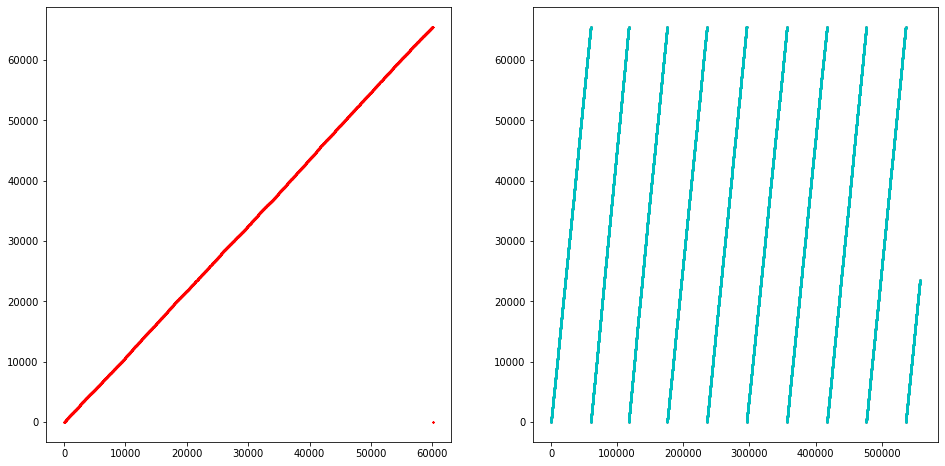

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
axes[0].scatter(range(60100), realtimeBq[0, :60100], s=0.2, c='r')
axes[1].scatter(range(realtimeBq.shape[1]), realtimeBq, s=0.2, c='c')
plt.show()

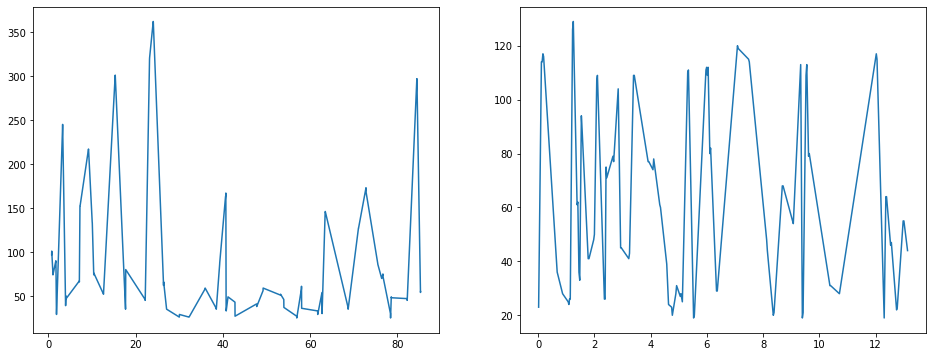

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
axes[0].plot(realtimeBq[0, : 100], pulseBq[0, :100])
axes[1].plot(realtimeCs137[0, : 100], pulseCs137[0, : 100])
plt.show()

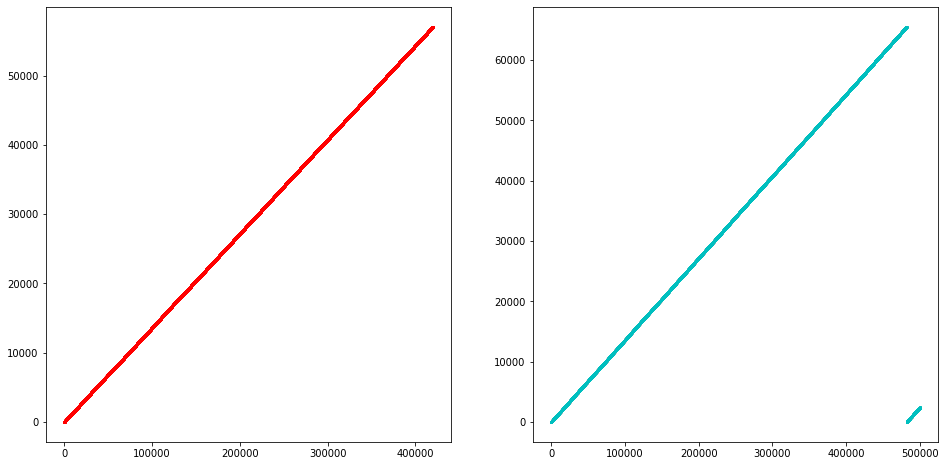

In [87]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
axes[0].scatter(range(420000), realtimeCs137[0, :420000], s=1, c='r')
axes[1].scatter(range(500000), realtimeCs137[0, :500000], s=0.2, c='c')
plt.show()

In [89]:
for i in range(realtimeCs137.shape[1]):
    if realtimeCs137[0, i] < 5:
        print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 482020 482021 482022 1443068 1443069 1443070 1443071 1443072 1443073 2395405 2395406 2395407 2395408 2395409 2395410 2395411 2395412 2395413 2395414 2395415 2395416 2395417 2395418 2395419 2395420 2395421 2395422 2395423 2395424 2395425 2395426 2395427 2395428 2395429 2395430 2395431 2395432 2395433 2395434 2395435 2395436 2395437 2395438 2395439 2395440 2395441 2875330 2875331 3836134 3836135 3836136 3836137 3836138 3836139 3836140 3836141 3836142 3836143 3836144 3836145 3836146 3836147 3836148 3836149 3836150 3836151 3836152 3836153 3836154 3836155 3836156 4794359 4794360 4794361 4794362 4794363 4794364 4794365 4794366 4794367 4794368 4794369 4794370 4794371 4794372 4794373 4794374 4794375 4794376 4794377 4794378 4794379 4794380 4794381 5275597 5275598 5275599 5275600 5275601 5275602 5275603 5275604 

In [168]:
realtimeCs137[0, 482019] 

65539.7166

In [91]:
realtimeCs137[0, 482020]  

4.231

In [77]:
np.where(realtimeBq < 10), np.where(realtimeCs137 < 10)

((array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
  array([     0,      1,      2,      3,      4,      5,      6,      7,
              8,      9,     10,     11,     12,     13,     14,     15,
             16,     17,     18,     19,  60051,  60052, 175646, 175647,
         175648, 175649, 175650, 175651, 175652, 175653, 175654, 175655,
         235712, 235713, 295675, 295676, 356693, 356694, 356695, 356696,
         356697, 356698, 417286, 417287, 417288, 417289, 476585, 476586,
         476587, 476588, 476589, 476590, 476591, 476592, 536242, 536243,
         536244, 536245, 536246, 536247], dtype=int64)),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### 5 卷积神经网络数据

In [224]:
index = np.random.randint(dataSet.shape[0], size=(1, dataSet.shape[0]))
dataSet = dataSet[index[0], :, :, :]

dataSet.shape

(6377, 50, 50, 2)

In [225]:
labels = labels[index[0]]
labels.shape

(6377, 1)

In [226]:
trainData = dataSet[:5000, :, :, :]
testData = dataSet[5000: , :, :, :]
train_labels = labels[: 5000, 0]
test_labels = labels[5000: , 0]
trainData.shape, testData.shape, train_labels.shape, test_labels.shape

((5000, 50, 50, 2), (1377, 50, 50, 2), (5000,), (1377,))

In [235]:
trainData[:, :, :, 0] = trainData[:, :, :, 0] / np.max(trainData[:, :, :, 0])
trainData[:, :, :, 1] = trainData[:, :, :, 1] / np.max(trainData[:, :, :, 1])
testData[:, :, :, 0] = testData[:, :, :, 0] / np.max(testData[:, :, :, 0])
testData[:, :, :, 1] = testData[:, :, :, 1] / np.max(testData[:, :, :, 1])

### 6 训练模型

In [192]:
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [193]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        608       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          36928     
Total params: 56,032
Trainable params: 56,032
Non-trainable params: 0
_________________________________________________________________


In [194]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [195]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        608       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [196]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [197]:
history = model.fit(trainData, trainLabels, epochs=10)

Train on 7000 samples
Epoch 1/10
6016/7000 [========================>.....] - ETA: 8:35 - loss: 1.3775 - accuracy: 0.43 - ETA: 4:26 - loss: 1.3352 - accuracy: 0.39 - ETA: 3:02 - loss: 1.2890 - accuracy: 0.39 - ETA: 2:21 - loss: 1.2361 - accuracy: 0.42 - ETA: 1:56 - loss: 1.2460 - accuracy: 0.41 - ETA: 1:40 - loss: 1.2129 - accuracy: 0.41 - ETA: 1:28 - loss: 1.2121 - accuracy: 0.40 - ETA: 1:18 - loss: 1.1889 - accuracy: 0.41 - ETA: 1:11 - loss: 1.1760 - accuracy: 0.40 - ETA: 1:05 - loss: 1.1754 - accuracy: 0.39 - ETA: 1:00 - loss: 1.1762 - accuracy: 0.38 - ETA: 56s - loss: 1.1622 - accuracy: 0.3880 - ETA: 53s - loss: 1.1539 - accuracy: 0.384 - ETA: 50s - loss: 1.1510 - accuracy: 0.377 - ETA: 48s - loss: 1.1413 - accuracy: 0.379 - ETA: 45s - loss: 1.1302 - accuracy: 0.384 - ETA: 43s - loss: 1.1142 - accuracy: 0.386 - ETA: 42s - loss: 1.1064 - accuracy: 0.385 - ETA: 40s - loss: 1.0963 - accuracy: 0.383 - ETA: 39s - loss: 1.0838 - accuracy: 0.398 - ETA: 38s - loss: 1.0708 - accuracy: 0.407

6080/7000 [=========================>....] - ETA: 17s - loss: 0.0016 - accuracy: 1.000 - ETA: 17s - loss: 0.0018 - accuracy: 1.000 - ETA: 16s - loss: 0.0029 - accuracy: 1.000 - ETA: 16s - loss: 0.0029 - accuracy: 1.000 - ETA: 16s - loss: 0.0050 - accuracy: 1.000 - ETA: 16s - loss: 0.0050 - accuracy: 1.000 - ETA: 16s - loss: 0.0055 - accuracy: 1.000 - ETA: 17s - loss: 0.0056 - accuracy: 1.000 - ETA: 16s - loss: 0.0060 - accuracy: 1.000 - ETA: 16s - loss: 0.0061 - accuracy: 1.000 - ETA: 16s - loss: 0.0068 - accuracy: 1.000 - ETA: 16s - loss: 0.0065 - accuracy: 1.000 - ETA: 16s - loss: 0.0066 - accuracy: 1.000 - ETA: 16s - loss: 0.0076 - accuracy: 1.000 - ETA: 16s - loss: 0.0079 - accuracy: 1.000 - ETA: 16s - loss: 0.0075 - accuracy: 1.000 - ETA: 16s - loss: 0.0080 - accuracy: 1.000 - ETA: 16s - loss: 0.0081 - accuracy: 1.000 - ETA: 16s - loss: 0.0087 - accuracy: 1.000 - ETA: 16s - loss: 0.0086 - accuracy: 1.000 - ETA: 16s - loss: 0.0082 - accuracy: 1.000 - ETA: 16s - loss: 0.0081 - accur

7000/7000 [==============================] - ETA: 2s - loss: 0.0051 - accuracy: 0.99 - ETA: 2s - loss: 0.0052 - accuracy: 0.99 - ETA: 2s - loss: 0.0051 - accuracy: 0.99 - ETA: 2s - loss: 0.0051 - accuracy: 0.99 - ETA: 1s - loss: 0.0051 - accuracy: 0.99 - ETA: 1s - loss: 0.0051 - accuracy: 0.99 - ETA: 1s - loss: 0.0051 - accuracy: 0.99 - ETA: 1s - loss: 0.0051 - accuracy: 0.99 - ETA: 1s - loss: 0.0051 - accuracy: 0.99 - ETA: 1s - loss: 0.0051 - accuracy: 0.99 - ETA: 1s - loss: 0.0050 - accuracy: 0.99 - ETA: 1s - loss: 0.0050 - accuracy: 0.99 - ETA: 1s - loss: 0.0050 - accuracy: 0.99 - ETA: 1s - loss: 0.0050 - accuracy: 0.99 - ETA: 1s - loss: 0.0050 - accuracy: 0.99 - ETA: 1s - loss: 0.0049 - accuracy: 0.99 - ETA: 0s - loss: 0.0049 - accuracy: 0.99 - ETA: 0s - loss: 0.0049 - accuracy: 0.99 - ETA: 0s - loss: 0.0049 - accuracy: 0.99 - ETA: 0s - loss: 0.0049 - accuracy: 0.99 - ETA: 0s - loss: 0.0048 - accuracy: 0.99 - ETA: 0s - loss: 0.0048 - accuracy: 0.99 - ETA: 0s - loss: 0.0048 - accura

6080/7000 [=========================>....] - ETA: 15s - loss: 0.0025 - accuracy: 1.000 - ETA: 15s - loss: 0.0026 - accuracy: 1.000 - ETA: 15s - loss: 0.0019 - accuracy: 1.000 - ETA: 16s - loss: 0.0016 - accuracy: 1.000 - ETA: 16s - loss: 0.0016 - accuracy: 1.000 - ETA: 16s - loss: 0.0016 - accuracy: 1.000 - ETA: 15s - loss: 0.0015 - accuracy: 1.000 - ETA: 15s - loss: 0.0014 - accuracy: 1.000 - ETA: 15s - loss: 0.0017 - accuracy: 1.000 - ETA: 15s - loss: 0.0018 - accuracy: 1.000 - ETA: 15s - loss: 0.0024 - accuracy: 1.000 - ETA: 15s - loss: 0.0022 - accuracy: 1.000 - ETA: 15s - loss: 0.0023 - accuracy: 1.000 - ETA: 15s - loss: 0.0025 - accuracy: 1.000 - ETA: 15s - loss: 0.0025 - accuracy: 1.000 - ETA: 15s - loss: 0.0039 - accuracy: 1.000 - ETA: 15s - loss: 0.0038 - accuracy: 1.000 - ETA: 14s - loss: 0.0041 - accuracy: 1.000 - ETA: 14s - loss: 0.0045 - accuracy: 1.000 - ETA: 14s - loss: 0.0045 - accuracy: 1.000 - ETA: 14s - loss: 0.0043 - accuracy: 1.000 - ETA: 14s - loss: 0.0042 - accur

7000/7000 [==============================] - ETA: 2s - loss: 0.0021 - accuracy: 1.00 - ETA: 2s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0021 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 1s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accuracy: 1.00 - ETA: 0s - loss: 0.0020 - accura

6080/7000 [=========================>....] - ETA: 14s - loss: 0.0763 - accuracy: 0.968 - ETA: 14s - loss: 0.0387 - accuracy: 0.984 - ETA: 15s - loss: 0.0299 - accuracy: 0.989 - ETA: 15s - loss: 0.0227 - accuracy: 0.992 - ETA: 15s - loss: 0.0293 - accuracy: 0.993 - ETA: 15s - loss: 0.0245 - accuracy: 0.994 - ETA: 15s - loss: 0.0210 - accuracy: 0.995 - ETA: 15s - loss: 0.0184 - accuracy: 0.996 - ETA: 15s - loss: 0.0164 - accuracy: 0.996 - ETA: 15s - loss: 0.0148 - accuracy: 0.996 - ETA: 15s - loss: 0.0142 - accuracy: 0.997 - ETA: 15s - loss: 0.0141 - accuracy: 0.997 - ETA: 15s - loss: 0.0132 - accuracy: 0.997 - ETA: 15s - loss: 0.0126 - accuracy: 0.997 - ETA: 15s - loss: 0.0120 - accuracy: 0.997 - ETA: 15s - loss: 0.0113 - accuracy: 0.998 - ETA: 15s - loss: 0.0106 - accuracy: 0.998 - ETA: 15s - loss: 0.0101 - accuracy: 0.998 - ETA: 15s - loss: 0.0095 - accuracy: 0.998 - ETA: 15s - loss: 0.0095 - accuracy: 0.998 - ETA: 15s - loss: 0.0090 - accuracy: 0.998 - ETA: 15s - loss: 0.0087 - accur

7000/7000 [==============================] - ETA: 2s - loss: 0.0025 - accuracy: 0.99 - ETA: 2s - loss: 0.0025 - accuracy: 0.99 - ETA: 1s - loss: 0.0025 - accuracy: 0.99 - ETA: 1s - loss: 0.0025 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0026 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 0s - loss: 0.0032 - accuracy: 0.99 - ETA: 0s - loss: 0.0032 - accuracy: 0.99 - ETA: 0s - loss: 0.0032 - accuracy: 0.99 - ETA: 0s - loss: 0.0035 - accuracy: 0.99 - ETA: 0s - loss: 0.0035 - accuracy: 0.99 - ETA: 0s - loss: 0.0035 - accuracy: 0.99 - ETA: 0s - loss: 0.0034 - accuracy: 0.99 - ETA: 0s - loss: 0.0034 - accura

5568/7000 [======================>.......] - ETA: 16s - loss: 2.2076e-05 - accuracy: 1.000 - ETA: 16s - loss: 3.0155e-05 - accuracy: 1.000 - ETA: 16s - loss: 1.6164e-04 - accuracy: 1.000 - ETA: 16s - loss: 1.3252e-04 - accuracy: 1.000 - ETA: 16s - loss: 4.0846e-04 - accuracy: 1.000 - ETA: 16s - loss: 4.7268e-04 - accuracy: 1.000 - ETA: 16s - loss: 5.3049e-04 - accuracy: 1.000 - ETA: 16s - loss: 4.7038e-04 - accuracy: 1.000 - ETA: 16s - loss: 4.4705e-04 - accuracy: 1.000 - ETA: 16s - loss: 4.0449e-04 - accuracy: 1.000 - ETA: 16s - loss: 3.9637e-04 - accuracy: 1.000 - ETA: 16s - loss: 3.6782e-04 - accuracy: 1.000 - ETA: 16s - loss: 3.5062e-04 - accuracy: 1.000 - ETA: 16s - loss: 3.4437e-04 - accuracy: 1.000 - ETA: 16s - loss: 3.3360e-04 - accuracy: 1.000 - ETA: 16s - loss: 3.2502e-04 - accuracy: 1.000 - ETA: 16s - loss: 3.1340e-04 - accuracy: 1.000 - ETA: 15s - loss: 3.0010e-04 - accuracy: 1.000 - ETA: 15s - loss: 2.9577e-04 - accuracy: 1.000 - ETA: 15s - loss: 2.8558e-04 - accuracy: 1.0

7000/7000 [==============================] - ETA: 3s - loss: 4.4251e-04 - accuracy: 1.00 - ETA: 3s - loss: 4.4013e-04 - accuracy: 1.00 - ETA: 3s - loss: 4.3786e-04 - accuracy: 1.00 - ETA: 3s - loss: 4.3550e-04 - accuracy: 1.00 - ETA: 3s - loss: 4.3321e-04 - accuracy: 1.00 - ETA: 3s - loss: 4.3132e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.2904e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.2694e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.2478e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.2347e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.2130e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.1920e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.1725e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.1538e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.1327e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.1230e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.1043e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.0864e-04 - accuracy: 1.00 - ETA: 2s - loss: 4.0665e-04 - accuracy: 1.00 - ETA: 1s - loss: 4.0469e-04 - accuracy: 1.00 - ETA: 1s - loss: 4.0303e-04 - accura

6080/7000 [=========================>....] - ETA: 15s - loss: 0.1260 - accuracy: 1.000 - ETA: 16s - loss: 0.5155 - accuracy: 0.968 - ETA: 16s - loss: 0.3628 - accuracy: 0.979 - ETA: 16s - loss: 0.3044 - accuracy: 0.976 - ETA: 16s - loss: 0.2760 - accuracy: 0.975 - ETA: 16s - loss: 0.2374 - accuracy: 0.979 - ETA: 15s - loss: 0.2099 - accuracy: 0.982 - ETA: 15s - loss: 0.2016 - accuracy: 0.968 - ETA: 15s - loss: 0.1814 - accuracy: 0.972 - ETA: 15s - loss: 0.1651 - accuracy: 0.975 - ETA: 15s - loss: 0.1512 - accuracy: 0.977 - ETA: 15s - loss: 0.1409 - accuracy: 0.979 - ETA: 15s - loss: 0.1318 - accuracy: 0.980 - ETA: 15s - loss: 0.1243 - accuracy: 0.982 - ETA: 15s - loss: 0.1169 - accuracy: 0.983 - ETA: 15s - loss: 0.1101 - accuracy: 0.984 - ETA: 15s - loss: 0.1042 - accuracy: 0.985 - ETA: 15s - loss: 0.0993 - accuracy: 0.986 - ETA: 15s - loss: 0.0954 - accuracy: 0.986 - ETA: 15s - loss: 0.0909 - accuracy: 0.987 - ETA: 15s - loss: 0.0868 - accuracy: 0.988 - ETA: 15s - loss: 0.0831 - accur

7000/7000 [==============================] - ETA: 2s - loss: 0.0129 - accuracy: 0.99 - ETA: 2s - loss: 0.0130 - accuracy: 0.99 - ETA: 1s - loss: 0.0130 - accuracy: 0.99 - ETA: 1s - loss: 0.0129 - accuracy: 0.99 - ETA: 1s - loss: 0.0129 - accuracy: 0.99 - ETA: 1s - loss: 0.0128 - accuracy: 0.99 - ETA: 1s - loss: 0.0127 - accuracy: 0.99 - ETA: 1s - loss: 0.0127 - accuracy: 0.99 - ETA: 1s - loss: 0.0127 - accuracy: 0.99 - ETA: 1s - loss: 0.0126 - accuracy: 0.99 - ETA: 1s - loss: 0.0126 - accuracy: 0.99 - ETA: 1s - loss: 0.0125 - accuracy: 0.99 - ETA: 1s - loss: 0.0124 - accuracy: 0.99 - ETA: 1s - loss: 0.0124 - accuracy: 0.99 - ETA: 1s - loss: 0.0123 - accuracy: 0.99 - ETA: 0s - loss: 0.0123 - accuracy: 0.99 - ETA: 0s - loss: 0.0122 - accuracy: 0.99 - ETA: 0s - loss: 0.0122 - accuracy: 0.99 - ETA: 0s - loss: 0.0121 - accuracy: 0.99 - ETA: 0s - loss: 0.0121 - accuracy: 0.99 - ETA: 0s - loss: 0.0120 - accuracy: 0.99 - ETA: 0s - loss: 0.0120 - accuracy: 0.99 - ETA: 0s - loss: 0.0119 - accura

In [198]:
acy = history.history['accuracy']
loss = history.history['loss']

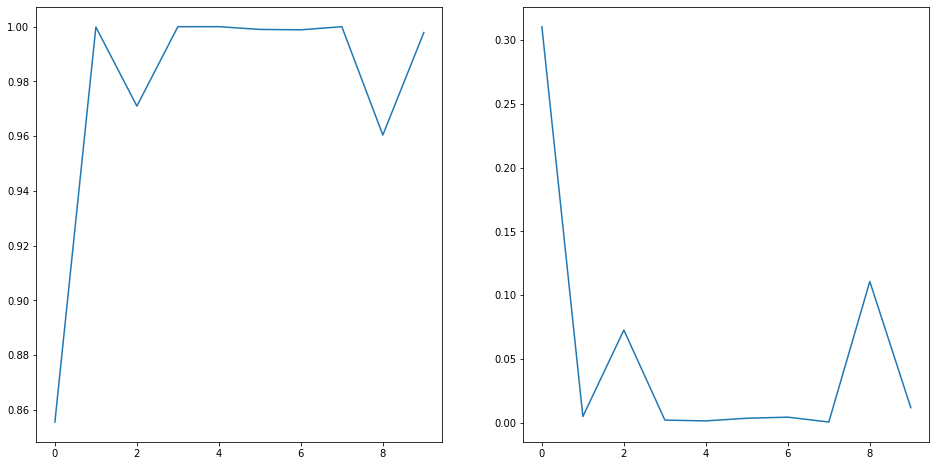

In [199]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
axes[0].plot(acy)
axes[1].plot(loss)
plt.show()

In [200]:
result = model.predict(testData)
result

array([[9.6966176e-07, 3.4910352e-07, 9.9999869e-01, 3.2000024e-11],
       [8.8533934e-06, 1.1090344e-07, 9.9999106e-01, 5.1052401e-10],
       [3.2188000e-17, 9.9999189e-01, 8.0626351e-06, 1.4083975e-15],
       ...,
       [7.1792806e-06, 1.9973252e-06, 9.9999082e-01, 8.0025375e-10],
       [6.7182455e-16, 9.9996614e-01, 3.3909211e-05, 3.6693099e-15],
       [9.0885500e-08, 3.9561443e-02, 9.6043825e-01, 2.7195054e-07]],
      dtype=float32)

In [201]:
array = np.zeros((len(result), 1))
for i in range(len(result)):
    array[i] = np.argmax(result[i])
array
    

array([[2.],
       [2.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [202]:
num = 0
for i in range(len(array)):
    if array[i, 0] == testLabels[i]:
        num += 1
num

4054

In [203]:
num/testLabels.shape[0]

1.0

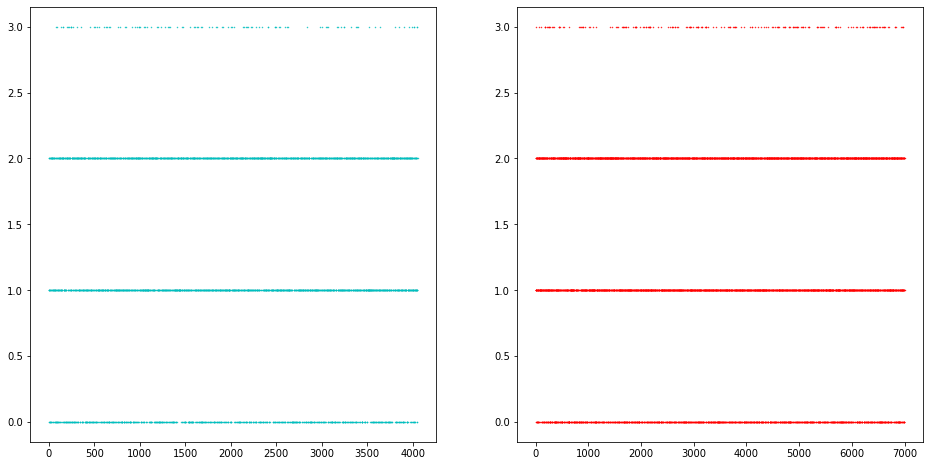

In [205]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
axes[0].scatter(range(testLabels.shape[0]), testLabels, s=0.2, c='c')
axes[1].scatter(range(trainLabels.shape[0]), trainLabels, s=0.2, c='r')
plt.show()

In [163]:
net = nn.Sequential()
net.add(nn.Conv2D(channels=6, kernel_size=5, activation='sigmoid'),
            nn.MaxPool2D(pool_size=2, strides=2),
            nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'),
            nn.MaxPool2D(pool_size=2, strides=2),
            # Dense会默认将(批量⼤⼩, 通道, ⾼, 宽)形状的输⼊转换成
            # (批量⼤⼩, 通道* ⾼* 宽)形状的输⼊
            nn.Dense(120, activation='sigmoid'),
            nn.Dense(84, activation='sigmoid'),
            nn.Dense(10))

In [140]:
X = nd.random.uniform(shape=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(nd.array(dataCs137))
    print(layer.name, 'output shape:\t', X.shape)

conv30 output shape:	 (168, 96, 10, 10)
pool18 output shape:	 (168, 1, 24, 24)
conv31 output shape:	 (168, 256, 50, 50)
pool19 output shape:	 (168, 1, 24, 24)
conv32 output shape:	 (168, 384, 50, 50)
conv33 output shape:	 (168, 384, 50, 50)
conv34 output shape:	 (168, 256, 50, 50)
pool20 output shape:	 (168, 1, 24, 24)
dense18 output shape:	 (168, 4096)
dropout12 output shape:	 (168, 1, 50, 50)
dense19 output shape:	 (168, 4096)
dropout13 output shape:	 (168, 1, 50, 50)
dense20 output shape:	 (168, 2)


In [164]:
X = nd.random.uniform(shape=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv40 output shape:	 (1, 6, 220, 220)
pool24 output shape:	 (1, 6, 110, 110)
conv41 output shape:	 (1, 16, 106, 106)
pool25 output shape:	 (1, 16, 53, 53)
dense24 output shape:	 (1, 120)
dense25 output shape:	 (1, 84)
dense26 output shape:	 (1, 10)


In [132]:
nn.Conv2D?

In [157]:
batch_size = 32
index = np.random.randint(336, size=336)
dataSet = dataSet[index, :, :, :]
train_iter = nd.array(dataSet[: 200, :, :, :])
test_iter = nd.array(dataSet[200:, :, :, :])

train_iter.shape, test_iter.shape

((200, 1, 50, 50), (136, 1, 50, 50))

In [158]:
lr, num_epochs, ctx = 0.01, 5, d2l.try_gpu()
net.initialize(force_reinit=True, ctx=ctx, init=init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
d2l.train_ch5(net, train_iter, test_iter, batch_size, trainer, ctx, num_epochs)

training on cpu(0)


ValueError: not enough values to unpack (expected 2, got 1)

In [152]:
net.collect_params?

In [166]:
d2l.train_2d??

In [166]:
n1 = pulseCs137.shape[1]//2500
n2 = pulseCo.shape[1]//2500
n3 = pulseCo60_Cs137.shape[1]//2500
n4 = pulseEu155_Na22.shape[1]//2500
nuc_ii = []

dataSetPulse = np.zeros((n1 + n2 + n3 + n4, 2500))
dataSetTime = np.zeros((n1 + n2 + n3 + n4, 2500))

for i in range(n1):
    dataSetPulse[i, :] = pulseCs137[0, i * 2500: i * 2500 + 2500]
    dataSetTime[i, :] = realtimeCs137[0, i * 2500: i * 2500 + 2500]
    nuc_ii.append(0) # Cs137 : 0
for i in range(n2):
    dataSetPulse[i + n1, :] = pulseCo[0, i * 2500: i * 2500 + 2500]
    dataSetTime[i + n1, :] = realtimeCo[0, i * 2500: i * 2500 + 2500]
    nuc_ii.append(1) # Co : 1
for i in range(n3):
    dataSetPulse[i + n1 + n2, :] = pulseCo60_Cs137[0, i * 2500: i * 2500 + 2500]
    dataSetTime[i + n1 + n2, :] = realtimeCo60_Cs137[0, i * 2500: i * 2500 + 2500]
    nuc_ii.append(2) # Co60 Cs 137  : 2
for i in range(n4):
    dataSetPulse[i + n1 + n2 + n3, :] = pulseEu155_Na22[0, i * 2500: i * 2500 + 2500]
    dataSetTime[i + n1 + n2 + n3, :] = realtimeEu155_Na22[0, i * 2500: i * 2500 + 2500]
    nuc_ii.append(3) # Eu155_Na22 : 3

In [167]:
dataSetPulse.shape

(11135, 2500)

In [168]:
aa = np.array(nuc_ii)
aa.shape

(11135,)

In [169]:
dataSet2 = np.hstack((dataSetPulse, aa.reshape(aa.shape[0], 1)))
dataSet2.shape

(11135, 2501)

In [170]:
fr1 = pd.DataFrame(dataSet2)
fr1

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,23.0,114.0,114.0,117.0,116.0,36.0,35.0,28.0,25.0,24.0,...,38.0,28.0,24.0,115.0,116.0,30.0,29.0,66.0,65.0,0.0
1,109.0,112.0,122.0,123.0,30.0,39.0,40.0,108.0,105.0,113.0,...,25.0,24.0,38.0,39.0,112.0,114.0,80.0,79.0,20.0,0.0
2,21.0,22.0,20.0,56.0,110.0,109.0,116.0,116.0,38.0,113.0,...,56.0,112.0,112.0,113.0,115.0,114.0,113.0,117.0,120.0,0.0
3,54.0,55.0,35.0,32.0,59.0,58.0,73.0,75.0,24.0,23.0,...,39.0,69.0,69.0,41.0,41.0,110.0,112.0,207.0,202.0,0.0
4,33.0,34.0,20.0,110.0,109.0,21.0,23.0,53.0,53.0,18.0,...,33.0,115.0,25.0,23.0,112.0,113.0,108.0,109.0,108.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,25.0,23.0,20.0,23.0,16.0,15.0,27.0,30.0,35.0,37.0,...,219.0,18.0,19.0,19.0,39.0,38.0,36.0,37.0,36.0,3.0
11131,73.0,72.0,38.0,36.0,18.0,18.0,17.0,18.0,20.0,19.0,...,181.0,181.0,94.0,93.0,18.0,18.0,42.0,41.0,48.0,3.0
11132,50.0,34.0,35.0,16.0,17.0,41.0,42.0,64.0,64.0,89.0,...,44.0,46.0,96.0,97.0,62.0,63.0,19.0,19.0,35.0,3.0
11133,37.0,19.0,17.0,35.0,21.0,25.0,34.0,34.0,51.0,86.0,...,17.0,76.0,75.0,28.0,27.0,171.0,172.0,87.0,88.0,3.0


In [171]:
fr2 = pd.DataFrame(dataSetTime)
fr2

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0220,0.1208,0.1460,0.1740,0.1986,0.6814,0.7060,0.8740,1.0720,1.0974,...,321.7622,321.7886,321.9280,321.9544,323.0024,323.0290,323.1992,323.2262,323.5290,323.5540
1,323.5892,323.6136,323.6346,323.6582,323.7582,323.9508,323.9758,324.0214,324.0476,324.2434,...,670.7084,671.1250,671.1500,671.3912,671.4160,671.5562,671.5828,671.7618,671.7884,672.3882
2,672.4158,673.4258,673.4524,673.5314,673.6350,673.6606,673.9064,673.9328,674.1066,674.7086,...,1018.2674,1018.2946,1018.3874,1018.4134,1018.7042,1018.7306,1018.7686,1018.7938,1018.9022,1018.9280
3,1019.1612,1019.1862,1019.6476,1019.6730,1019.7700,1019.7962,1020.5138,1020.5394,1020.6956,1020.7212,...,1357.7292,1357.7554,1358.1994,1358.2256,1358.6246,1358.6504,1359.1626,1359.1886,1359.3802,1359.4048
4,1359.5428,1359.5694,1359.8832,1360.1066,1360.1322,1360.1530,1360.1770,1360.4792,1360.5044,1360.8108,...,1680.7774,1680.8038,1680.8694,1681.4416,1681.4666,1681.4864,1681.5142,1681.5754,1681.6510,1681.6762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,21299.0818,21299.1072,21299.5854,21299.6116,21301.1124,21301.1402,21302.1564,21302.1824,21302.4806,21302.5066,...,23206.6454,23206.6710,23206.7648,23206.7922,23207.6020,23208.4856,23210.5802,23210.6062,23212.1132,23212.1392
11131,23213.2654,23213.2906,23213.4462,23213.4722,23213.8386,23213.8650,23215.1242,23215.1514,23215.8802,23215.9070,...,25232.0726,25234.0622,25234.0866,25235.1106,25235.1378,25235.4720,25235.4978,25235.7932,25235.8196,25238.5198
11132,25238.5458,25239.9602,25239.9870,25241.5098,25241.5360,25243.0870,25243.1122,25244.6904,25244.7152,25246.8596,...,27156.1792,27156.7932,27156.8202,27158.1824,27158.2068,27158.9064,27158.9312,27160.1832,27160.2092,27161.2874
11133,27161.3136,27161.5862,27161.6112,27162.2104,27167.9958,27168.0218,27173.8528,27173.8786,27174.0216,27175.1878,...,29121.9866,29122.0140,29122.5288,29122.5548,29123.9612,29123.9876,29128.4714,29128.4982,29128.8862,29128.9120


In [172]:
fr1.to_csv('../Cs137data/csv/pulse2525.csv')
fr2.to_csv('../Cs137data/csv/realtime2525.csv')

In [147]:
data = np.zeros((realtimeCs137.shape[1]//2500, 2500))
for i in range(realtimeCs137.shape[1]//2500):
    data[i, :] = realtimeCs137[0, i * 2500: i * 2500 + 2500]
    data[i, :] = data[i, :] - data[i, 0]
data

array([[0.000000e+00, 9.880000e-02, 1.240000e-01, ..., 3.232042e+02,
        3.235070e+02, 3.235320e+02],
       [0.000000e+00, 2.440000e-02, 4.540000e-02, ..., 3.481726e+02,
        3.481992e+02, 3.487990e+02],
       [0.000000e+00, 1.010000e+00, 1.036600e+00, ..., 3.463780e+02,
        3.464864e+02, 3.465122e+02],
       ...,
       [0.000000e+00, 7.658000e-01, 7.908000e-01, ..., 3.513006e+02,
        3.513256e+02, 3.515142e+02],
       [0.000000e+00, 2.020000e-02, 5.740000e-01, ..., 3.428496e+02,
        3.433064e+02, 3.433306e+02],
       [0.000000e+00, 2.480000e-02, 2.006000e-01, ..., 3.386002e+02,
        3.386658e+02, 3.386896e+02]])

In [154]:
label_cs = np.zeros((data.shape[0], 1))

In [148]:
indexs3 = []
for i in range(pulseCs137.shape[1]//2500):
    if np.min(data[i, :]) < 0:
        indexs3.append(i)

In [149]:
indexs3

[155,
 192,
 385,
 577,
 597,
 767,
 958,
 970,
 1150,
 1342,
 1534,
 1725,
 1917,
 1937,
 2091,
 2110]

### 7 制作数据集

In [155]:
cwd = 'D:\PyCharm Community Edition 2017.2.3\Work\google_net\jpg\\'
classes = {'daffodil', 'snowdrop', 'lilyvalley', 'bluebell', 'crocus', 'iris', 'tigerlily', 'tulip', 'fritiuary',
           'sunflower', 'daisy', 'coltsfoot', 'dandelion', 'cowslip', 'buttercup', 'windflower', 'pansy'}  # 花为 设定 17 类
writer = tf.python_io.TFRecordWriter("flower_train.tfrecords")  # 要生成的文件
 
for index, name in enumerate(classes):
    class_path = cwd + name + '\\'
    for img_name in os.listdir(class_path):
        img_path = class_path + img_name  # 每一个图片的地址
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img_raw = img.tobytes()  # 将图片转化为二进制格式
        example = tf.train.Example(features=tf.train.Features(feature={
            "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
            'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
        }))  # example对象对label和image数据进行封装
        writer.write(example.SerializeToString())  # 序列化为字符串
writer.close()

AttributeError: module 'tensorflow' has no attribute 'python_io'

In [159]:
example = tf.train.Example(features=tf.train.Features(feature={
            "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[1])),
            'realtime': tf.train.Feature(bytes_list=tf.train.BytesList(value=[1]))
        }))  # example对象对label和image数据进行封装

TypeError: 1 has type int, but expected one of: bytes

In [5]:
a = np.array([[1, 2 ,3, 4], [2, 3, 4, 5]])

In [8]:
print('a.shaep=', a.shape)

a.shaep= (2, 4)


In [7]:
import nucleus
from os import listdir
import numpy as np

In [8]:
filename = listdir('../Cs137data/lis/')
filename

['BenDi_10min_02.Lis',
 'Co60_10min_03.Lis',
 'Co60_180s_01.Lis',
 'Co60_180s_02.Lis',
 'Cs137_10min_01.Lis',
 'Cs137_180s_000.Lis',
 'Cs137_180s_001.Lis',
 'Cs137_180s_s1.Lis',
 'CsCo_10min_01.Lis',
 'Eu155_10min_01.Lis']

In [9]:
a = np.zeros((1, 5000))
b = np.zeros((4, 5000))
a.shape, b.shape

((1, 5000), (4, 5000))

In [10]:
np.vstack((a, b))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
## keyValue = {'BenDi': 0, 'Cs137': 1, 'CsCo': 2, 'Cs': 1, 'Co60': 3, 'Eu155': 4}
## nuc_index 数据的数字对应代表 核素

a, b, c = nucleus.get_file_fulldata(filename)

100%|██████████████████████████████████████████████████████████████████████████| 61340/61340 [00:43<00:00, 1404.29it/s]


i = 0, len = 111, nuc is BenDi  

100%|█████████████████████████████████████████████████████████████████████████| 137617/137617 [11:43<00:00, 195.48it/s]


i = 1, len = 2061, nuc is Co60  

100%|███████████████████████████████████████████████████████████████████████████| 23660/23660 [02:01<00:00, 194.63it/s]


i = 2, len = 357, nuc is Co60  

100%|███████████████████████████████████████████████████████████████████████████| 23635/23635 [01:59<00:00, 197.09it/s]


i = 3, len = 352, nuc is Co60  

100%|███████████████████████████████████████████████████████████████████████████| 78073/78073 [06:29<00:00, 200.60it/s]


i = 4, len = 1143, nuc is Cs137  

100%|███████████████████████████████████████████████████████████████████████████| 23882/23882 [02:00<00:00, 198.23it/s]


i = 5, len = 358, nuc is Cs137  

100%|███████████████████████████████████████████████████████████████████████████| 23882/23882 [02:00<00:00, 198.41it/s]


i = 6, len = 358, nuc is Cs137  

100%|███████████████████████████████████████████████████████████████████████████| 23880/23880 [02:02<00:00, 195.12it/s]


i = 7, len = 365, nuc is Cs137  

100%|█████████████████████████████████████████████████████████████████████████| 112028/112028 [12:31<00:00, 148.99it/s]


i = 8, len = 2202, nuc is CsCo  

100%|██████████████████████████████████████████████████████████████████████████| 62230/62230 [00:58<00:00, 1071.62it/s]


i = 9, len = 160, nuc is Eu155  
 time is :43:21
pulseDataSet.shape =  (7468, 5000) realtimeDataSet.shaep =  (7468, 5000) nuc_index.shape =  (7467,)


In [12]:
nucleus.get_file_fulldata??

In [2]:
import pandas as pd
import numpy as np
import nucleus as nuc

In [2]:
pulseData = pd.read_csv('../Cs137data/csv/pulse2525.csv')
realtimeData = pd.read_csv('../Cs137data/csv/realtime2525.csv')

In [3]:
pulse = pulseData.values
realtime = realtimeData.values
pulse[0], realtime[0], pulse.shape, realtime.shape

(array([  0.,  23., 114., ...,  66.,  65.,   0.]),
 array([0.000000e+00, 2.200000e-02, 1.208000e-01, ..., 3.232262e+02,
        3.235290e+02, 3.235540e+02]),
 (11135, 2502),
 (11135, 2501))

In [4]:
labels = pulse[:, -1]
pulse = pulse[:, 1: 2501]
realtime = realtime[:, 1: 2501]
pulse.shape, realtime.shape,labels.shape

((11135, 2500), (11135, 2500), (11135,))

In [5]:
dataSet, labels = nuc.scquential_data_trans_CNN_data(pulse, realtime, labels, Item_shape=[50, 50, 2])

len(index) = 81
pulse.shape =  (11054, 2500) realtime.shape =  (11054, 2500) dataSet.shape =  (11054, 50, 50, 2)


In [6]:
labels, labels.shape

(array([0., 2., 0., ..., 2., 1., 2.]), (11054,))

In [9]:
x_train, y_train, x_test, y_test = nuc.split_dataSet(dataSet, labels, test_size=0.3, random_state=42)

x_train.shape= (7737, 50, 50, 2) y_train.shape= (7737,) x_test.shape= (3317, 50, 50, 2) y_test.shape= (3317,)


### 8 30cm模型训练

#### 获取数据集

In [5]:
filename = listdir('../Cs137data/lis_30cm/')
filename

['Co60_10min_30cm.Lis',
 'Cs137_10min_30cm.Lis',
 'CsCo_10min_30cm.Lis',
 'Eu155_10min_30cm.Lis']

In [3]:
pulse, realtime, labels = nuc.get_file_fulldata('../Cs137data/lis_30cm/')


i = 0, len = 294, nuc is Co60 


i = 1, len = 285, nuc is Cs137 


i = 2, len = 419, nuc is CsCo 


i = 3, len = 158, nuc is Eu155 
 time is :3m50s
pulseDataSet.shape =  (1156, 2500) realtimeDataSet.shaep =  (1156, 2500) nuc_index.shape =  (1156,)


In [8]:
pulse = np.delete(pulse, 0, axis=0)
realtime = np.delete(realtime, 0, axis=0)
pulse.shape, realtime.shape

((1156, 2500), (1156, 2500))

In [52]:
label = np.reshape(labels, (labels.shape[0], 1))
label.shape

(1156, 1)

In [53]:
pulse1 = np.hstack((pulse, label))
pulse1.shape

(1156, 2501)

In [54]:
# 保存到 CSV中
fd1 = pd.DataFrame(pulse1)
fd2 = pd.DataFrame(realtime)


In [55]:
fd1.to_csv('../Cs137data/csv/pulse_30cm_Set.csv')
fd2.to_csv('../Cs137data/csv/realtime_30cm_Set.csv')

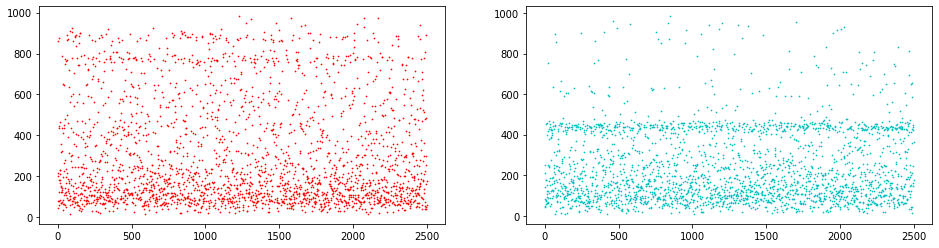

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].scatter(range(2500), pulse[0], c='r', s=0.5)
axes[1].scatter(range(2500), pulse[320], s=0.5, c='c')
plt.show()

In [12]:
dataSet30cm, labels_30cm = nuc.scquential_data_trans_CNN_data(pulse, realtime, labels)

len(index) = 36
pulse.shape =  (1120, 2500) realtime.shape =  (1120, 2500) dataSet.shape =  (1120, 50, 50, 2)


In [28]:
labels_30cm = labels_30cm[:] - 1
dataSet30cm[:, :, :, 0] = dataSet30cm[:, :, :, 0] / np.max(dataSet30cm[:, :, :, 0])
dataSet30cm[:, :, :, 1] = dataSet30cm[:, :, :, 1] / np.max(dataSet30cm[:, :, :, 1])

In [35]:
labels_30cm = labels_30cm[:] + 1

In [36]:
index = []
for i in range(dataSet30cm.shape[0]):
    if np.min(dataSet30cm[i]) < 0:
        index.append(i)
print(index)

[]


In [79]:
x_train30, y_train30, x_test30, y_test30 = nuc.split_dataSet(dataSet30cm, labels_30cm, test_size=0.2, random_state=42)

x_train.shape= (896, 50, 50, 2) y_train.shape= (896,) x_test.shape= (224, 50, 50, 2) y_test.shape= (224,)


#### 模型训练

In [80]:
model30 = models.Sequential()  # 线性模型
model30.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 2)))
model30.add(layers.MaxPooling2D((2, 2)))
model30.add(layers.Conv2D(64, (3, 3), activation='relu'))
model30.add(layers.MaxPooling2D((2, 2)))
model30.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [81]:
model30.add(layers.Flatten())
model30.add(layers.Dense(64, activation='relu'))
model30.add(layers.Dense(4, activation='softmax'))

In [82]:
model30.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
history = model30.fit(x_train30, y_train30, epochs=10)

Train on 896 samples
Epoch 1/10
896/896 [==============================] - ETA: 5s - loss: 1.4125 - accuracy: 0.15 - ETA: 3s - loss: 1.4441 - accuracy: 0.32 - ETA: 3s - loss: 1.4110 - accuracy: 0.33 - ETA: 2s - loss: 1.3841 - accuracy: 0.32 - ETA: 2s - loss: 1.3577 - accuracy: 0.32 - ETA: 2s - loss: 1.3208 - accuracy: 0.35 - ETA: 2s - loss: 1.2901 - accuracy: 0.34 - ETA: 1s - loss: 1.2500 - accuracy: 0.39 - ETA: 1s - loss: 1.2092 - accuracy: 0.42 - ETA: 1s - loss: 1.1643 - accuracy: 0.44 - ETA: 1s - loss: 1.1143 - accuracy: 0.47 - ETA: 1s - loss: 1.0721 - accuracy: 0.49 - ETA: 1s - loss: 1.0231 - accuracy: 0.53 - ETA: 1s - loss: 0.9789 - accuracy: 0.56 - ETA: 1s - loss: 0.9324 - accuracy: 0.59 - ETA: 1s - loss: 0.8856 - accuracy: 0.61 - ETA: 1s - loss: 0.8439 - accuracy: 0.63 - ETA: 0s - loss: 0.8065 - accuracy: 0.65 - ETA: 0s - loss: 0.7689 - accuracy: 0.67 - ETA: 0s - loss: 0.7366 - accuracy: 0.69 - ETA: 0s - loss: 0.7067 - accuracy: 0.70 - ETA: 0s - loss: 0.6782 - accuracy: 0.71 - E

In [84]:
acy = history.history['accuracy']
loss = history.history['loss']

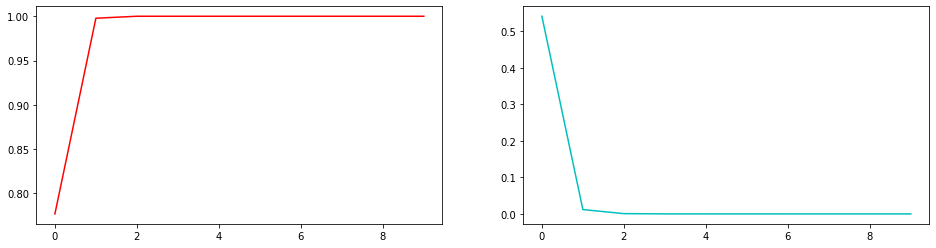

In [85]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(acy, c='r')
axes[1].plot(loss, c='c')
plt.show()

#### 模型测试

In [104]:
result1 = model30.predict(x_test30)
result1.shape

(224, 4)

In [105]:
array = np.zeros((len(result1), 1))
for i in range(len(result1)):
    array[i] = np.argmax(result1[i])
array

array([[2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [3.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [3.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [0.],
       [3.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [1.],
       [1.],
       [1.],
       [0.],
       [3.],
       [2.],

In [106]:
num = 0
for i in range(len(array)):
    if array[i, 0] == y_test30[i]:
        num += 1
num

224

### 9  10cm模型

#### 获取数据

In [56]:
fd3 = pd.read_csv('../Cs137data/csv/pulse2525.csv')
fd4 = pd.read_csv('../Cs137data/csv/realtime2525.csv')

In [62]:
pulse_10cm = fd3.values
realtime_10cm = fd4.values

In [63]:
pulse_10cm[0], realtime_10cm[0]

(array([  0.,  23., 114., ...,  66.,  65.,   0.]),
 array([0.000000e+00, 2.200000e-02, 1.208000e-01, ..., 3.232262e+02,
        3.235290e+02, 3.235540e+02]))

In [64]:
pulse_10cm.shape, realtime_10cm.shape

((11135, 2502), (11135, 2501))

In [65]:
labels = pulse_10cm[: ,-1]
pulse_10cm = pulse_10cm[:, 1: 2502]
realtime_10cm = realtime_10cm[:, 1: 2501]
labels.shape, pulse_10cm.shape, realtime_10cm.shape

((11135,), (11135, 2501), (11135, 2500))

In [67]:
dataSet10cm, labels_10cm = nuc.scquential_data_trans_CNN_data(pulse_10cm, realtime_10cm, labels)

len(index) = 81
pulse.shape =  (11054, 2501) realtime.shape =  (11054, 2500) dataSet.shape =  (11054, 50, 50, 2)


In [68]:
dataSet10cm[:, :, :, 0] = dataSet10cm[:, :, :, 0] / np.max(dataSet10cm[:, :, :, 0])
dataSet10cm[:, :, :, 1] = dataSet10cm[:, :, :, 1] / np.max(dataSet10cm[:, :, :, 1])

In [69]:
x_train, y_train, x_test, y_test = nuc.split_dataSet(dataSet10cm, labels_10cm, test_size=0.3, random_state=42)

x_train.shape= (7737, 50, 50, 2) y_train.shape= (7737,) x_test.shape= (3317, 50, 50, 2) y_test.shape= (3317,)


#### 训练模型

In [70]:
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [71]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit(x_train, y_train, epochs=10)

Train on 7737 samples
Epoch 1/10
6016/7737 [======================>.......] - ETA: 52s - loss: 1.3976 - accuracy: 0.218 - ETA: 37s - loss: 1.3593 - accuracy: 0.328 - ETA: 31s - loss: 1.2951 - accuracy: 0.354 - ETA: 27s - loss: 1.2654 - accuracy: 0.335 - ETA: 26s - loss: 1.2533 - accuracy: 0.343 - ETA: 25s - loss: 1.2318 - accuracy: 0.322 - ETA: 24s - loss: 1.1989 - accuracy: 0.343 - ETA: 24s - loss: 1.1790 - accuracy: 0.343 - ETA: 24s - loss: 1.1817 - accuracy: 0.336 - ETA: 23s - loss: 1.1639 - accuracy: 0.350 - ETA: 23s - loss: 1.1487 - accuracy: 0.360 - ETA: 22s - loss: 1.1284 - accuracy: 0.372 - ETA: 22s - loss: 1.1307 - accuracy: 0.372 - ETA: 22s - loss: 1.1266 - accuracy: 0.370 - ETA: 21s - loss: 1.1157 - accuracy: 0.372 - ETA: 21s - loss: 1.1118 - accuracy: 0.371 - ETA: 21s - loss: 1.1013 - accuracy: 0.380 - ETA: 21s - loss: 1.0935 - accuracy: 0.383 - ETA: 20s - loss: 1.0889 - accuracy: 0.381 - ETA: 20s - loss: 1.0826 - accuracy: 0.378 - ETA: 20s - loss: 1.0750 - accuracy: 0.383 

6016/7737 [======================>.......] - ETA: 21s - loss: 0.0060 - accuracy: 1.000 - ETA: 20s - loss: 0.0075 - accuracy: 1.000 - ETA: 19s - loss: 0.0081 - accuracy: 1.000 - ETA: 19s - loss: 0.0073 - accuracy: 1.000 - ETA: 19s - loss: 0.0078 - accuracy: 1.000 - ETA: 19s - loss: 0.0068 - accuracy: 1.000 - ETA: 19s - loss: 0.0065 - accuracy: 1.000 - ETA: 19s - loss: 0.0065 - accuracy: 1.000 - ETA: 19s - loss: 0.0071 - accuracy: 1.000 - ETA: 19s - loss: 0.0070 - accuracy: 1.000 - ETA: 19s - loss: 0.0066 - accuracy: 1.000 - ETA: 19s - loss: 0.0062 - accuracy: 1.000 - ETA: 19s - loss: 0.0059 - accuracy: 1.000 - ETA: 19s - loss: 0.0056 - accuracy: 1.000 - ETA: 19s - loss: 0.0060 - accuracy: 1.000 - ETA: 19s - loss: 0.0060 - accuracy: 1.000 - ETA: 19s - loss: 0.0057 - accuracy: 1.000 - ETA: 19s - loss: 0.0054 - accuracy: 1.000 - ETA: 19s - loss: 0.0053 - accuracy: 1.000 - ETA: 19s - loss: 0.0058 - accuracy: 1.000 - ETA: 19s - loss: 0.0065 - accuracy: 1.000 - ETA: 19s - loss: 0.0063 - accur

7737/7737 [==============================] - ETA: 4s - loss: 0.0742 - accuracy: 0.97 - ETA: 4s - loss: 0.0738 - accuracy: 0.97 - ETA: 4s - loss: 0.0735 - accuracy: 0.97 - ETA: 4s - loss: 0.0731 - accuracy: 0.97 - ETA: 4s - loss: 0.0727 - accuracy: 0.97 - ETA: 4s - loss: 0.0724 - accuracy: 0.97 - ETA: 4s - loss: 0.0720 - accuracy: 0.97 - ETA: 3s - loss: 0.0717 - accuracy: 0.97 - ETA: 3s - loss: 0.0713 - accuracy: 0.97 - ETA: 3s - loss: 0.0710 - accuracy: 0.97 - ETA: 3s - loss: 0.0706 - accuracy: 0.97 - ETA: 3s - loss: 0.0703 - accuracy: 0.97 - ETA: 3s - loss: 0.0699 - accuracy: 0.97 - ETA: 3s - loss: 0.0696 - accuracy: 0.97 - ETA: 3s - loss: 0.0693 - accuracy: 0.97 - ETA: 3s - loss: 0.0690 - accuracy: 0.97 - ETA: 3s - loss: 0.0687 - accuracy: 0.97 - ETA: 3s - loss: 0.0684 - accuracy: 0.97 - ETA: 3s - loss: 0.0680 - accuracy: 0.97 - ETA: 2s - loss: 0.0677 - accuracy: 0.97 - ETA: 2s - loss: 0.0674 - accuracy: 0.97 - ETA: 2s - loss: 0.0671 - accuracy: 0.97 - ETA: 2s - loss: 0.0668 - accura

5568/7737 [====================>.........] - ETA: 18s - loss: 0.0060 - accuracy: 1.000 - ETA: 19s - loss: 0.0038 - accuracy: 1.000 - ETA: 18s - loss: 0.0032 - accuracy: 1.000 - ETA: 18s - loss: 0.0025 - accuracy: 1.000 - ETA: 18s - loss: 0.0021 - accuracy: 1.000 - ETA: 18s - loss: 0.0018 - accuracy: 1.000 - ETA: 18s - loss: 0.0016 - accuracy: 1.000 - ETA: 18s - loss: 0.0014 - accuracy: 1.000 - ETA: 18s - loss: 0.0014 - accuracy: 1.000 - ETA: 18s - loss: 0.0012 - accuracy: 1.000 - ETA: 18s - loss: 0.0011 - accuracy: 1.000 - ETA: 18s - loss: 0.0011 - accuracy: 1.000 - ETA: 17s - loss: 0.0013 - accuracy: 1.000 - ETA: 17s - loss: 0.0014 - accuracy: 1.000 - ETA: 17s - loss: 0.0013 - accuracy: 1.000 - ETA: 17s - loss: 0.0012 - accuracy: 1.000 - ETA: 17s - loss: 0.0013 - accuracy: 1.000 - ETA: 17s - loss: 0.0013 - accuracy: 1.000 - ETA: 17s - loss: 0.0012 - accuracy: 1.000 - ETA: 17s - loss: 0.0011 - accuracy: 1.000 - ETA: 17s - loss: 0.0011 - accuracy: 1.000 - ETA: 17s - loss: 0.0011 - accur

7737/7737 [==============================] - ETA: 5s - loss: 6.4100e-04 - accuracy: 1.00 - ETA: 5s - loss: 6.3820e-04 - accuracy: 1.00 - ETA: 5s - loss: 6.3502e-04 - accuracy: 1.00 - ETA: 5s - loss: 6.3151e-04 - accuracy: 1.00 - ETA: 5s - loss: 6.3147e-04 - accuracy: 1.00 - ETA: 5s - loss: 6.2936e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.2854e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.2178e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.2075e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.2756e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.3605e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.4020e-04 - accuracy: 1.00 - ETA: 4s - loss: 9.4575e-04 - accuracy: 1.00 - ETA: 4s - loss: 9.6706e-04 - accuracy: 1.00 - ETA: 4s - loss: 9.6216e-04 - accuracy: 1.00 - ETA: 4s - loss: 9.6573e-04 - accuracy: 1.00 - ETA: 4s - loss: 9.9262e-04 - accuracy: 1.00 - ETA: 4s - loss: 0.0016 - accuracy: 0.9998   - ETA: 3s - loss: 0.0016 - accuracy: 0.99 - ETA: 3s - loss: 0.0016 - accuracy: 0.99 - ETA: 3s - loss: 0.0016 - accuracy: 0.99 - E

5504/7737 [====================>.........] - ETA: 18s - loss: 3.7780e-04 - accuracy: 1.000 - ETA: 19s - loss: 2.9030e-04 - accuracy: 1.000 - ETA: 19s - loss: 3.6842e-04 - accuracy: 1.000 - ETA: 21s - loss: 3.1582e-04 - accuracy: 1.000 - ETA: 21s - loss: 2.8423e-04 - accuracy: 1.000 - ETA: 21s - loss: 2.5492e-04 - accuracy: 1.000 - ETA: 21s - loss: 2.2685e-04 - accuracy: 1.000 - ETA: 21s - loss: 5.1349e-04 - accuracy: 1.000 - ETA: 21s - loss: 4.8650e-04 - accuracy: 1.000 - ETA: 21s - loss: 5.4947e-04 - accuracy: 1.000 - ETA: 21s - loss: 5.1492e-04 - accuracy: 1.000 - ETA: 21s - loss: 5.3323e-04 - accuracy: 1.000 - ETA: 21s - loss: 5.0067e-04 - accuracy: 1.000 - ETA: 21s - loss: 4.7952e-04 - accuracy: 1.000 - ETA: 21s - loss: 5.1558e-04 - accuracy: 1.000 - ETA: 20s - loss: 5.0506e-04 - accuracy: 1.000 - ETA: 20s - loss: 5.6892e-04 - accuracy: 1.000 - ETA: 20s - loss: 5.6424e-04 - accuracy: 1.000 - ETA: 20s - loss: 5.5815e-04 - accuracy: 1.000 - ETA: 20s - loss: 5.3802e-04 - accuracy: 1.0

7737/7737 [==============================] - ETA: 5s - loss: 7.2038e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.2415e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.3707e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.3459e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.3201e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.2954e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.2558e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.2181e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.3443e-04 - accuracy: 1.00 - ETA: 5s - loss: 7.3074e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.2788e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.2633e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.2296e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.1934e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.1765e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.1455e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.1126e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.0782e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.0470e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.0458e-04 - accuracy: 1.00 - ETA: 4s - loss: 7.0186e-04 - accura

5696/7737 [=====================>........] - ETA: 18s - loss: 1.2679e-04 - accuracy: 1.000 - ETA: 18s - loss: 7.8326e-05 - accuracy: 1.000 - ETA: 18s - loss: 8.2817e-05 - accuracy: 1.000 - ETA: 18s - loss: 7.4442e-05 - accuracy: 1.000 - ETA: 18s - loss: 6.4576e-04 - accuracy: 1.000 - ETA: 18s - loss: 5.4136e-04 - accuracy: 1.000 - ETA: 18s - loss: 5.2149e-04 - accuracy: 1.000 - ETA: 18s - loss: 4.5890e-04 - accuracy: 1.000 - ETA: 17s - loss: 4.1319e-04 - accuracy: 1.000 - ETA: 17s - loss: 3.8189e-04 - accuracy: 1.000 - ETA: 17s - loss: 3.4960e-04 - accuracy: 1.000 - ETA: 17s - loss: 3.2196e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.9893e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.7867e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.8444e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.8041e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.6795e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.5563e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.4495e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.4428e-04 - accuracy: 1.0

7737/7737 [==============================] - ETA: 4s - loss: 0.0294 - accuracy: 0.99 - ETA: 4s - loss: 0.0294 - accuracy: 0.99 - ETA: 4s - loss: 0.0293 - accuracy: 0.99 - ETA: 4s - loss: 0.0291 - accuracy: 0.99 - ETA: 4s - loss: 0.0290 - accuracy: 0.99 - ETA: 4s - loss: 0.0288 - accuracy: 0.99 - ETA: 4s - loss: 0.0287 - accuracy: 0.99 - ETA: 4s - loss: 0.0288 - accuracy: 0.99 - ETA: 4s - loss: 0.0287 - accuracy: 0.99 - ETA: 4s - loss: 0.0285 - accuracy: 0.99 - ETA: 4s - loss: 0.0284 - accuracy: 0.99 - ETA: 4s - loss: 0.0282 - accuracy: 0.99 - ETA: 3s - loss: 0.0281 - accuracy: 0.99 - ETA: 3s - loss: 0.0280 - accuracy: 0.99 - ETA: 3s - loss: 0.0280 - accuracy: 0.99 - ETA: 3s - loss: 0.0278 - accuracy: 0.99 - ETA: 3s - loss: 0.0277 - accuracy: 0.99 - ETA: 3s - loss: 0.0276 - accuracy: 0.99 - ETA: 3s - loss: 0.0274 - accuracy: 0.99 - ETA: 3s - loss: 0.0274 - accuracy: 0.99 - ETA: 3s - loss: 0.0272 - accuracy: 0.99 - ETA: 3s - loss: 0.0271 - accuracy: 0.99 - ETA: 3s - loss: 0.0270 - accura

6048/7737 [======================>.......] - ETA: 18s - loss: 0.0039 - accuracy: 1.000 - ETA: 19s - loss: 0.0038 - accuracy: 1.000 - ETA: 19s - loss: 0.0033 - accuracy: 1.000 - ETA: 18s - loss: 0.0026 - accuracy: 1.000 - ETA: 18s - loss: 0.0026 - accuracy: 1.000 - ETA: 18s - loss: 0.0022 - accuracy: 1.000 - ETA: 18s - loss: 0.0019 - accuracy: 1.000 - ETA: 18s - loss: 0.0017 - accuracy: 1.000 - ETA: 17s - loss: 0.0015 - accuracy: 1.000 - ETA: 17s - loss: 0.0014 - accuracy: 1.000 - ETA: 17s - loss: 0.0013 - accuracy: 1.000 - ETA: 17s - loss: 0.0012 - accuracy: 1.000 - ETA: 17s - loss: 0.0011 - accuracy: 1.000 - ETA: 17s - loss: 0.0011 - accuracy: 1.000 - ETA: 17s - loss: 0.0010 - accuracy: 1.000 - ETA: 17s - loss: 9.4544e-04 - accuracy: 1.000 - ETA: 17s - loss: 8.9599e-04 - accuracy: 1.000 - ETA: 17s - loss: 8.5064e-04 - accuracy: 1.000 - ETA: 17s - loss: 8.1390e-04 - accuracy: 1.000 - ETA: 17s - loss: 0.0016 - accuracy: 1.0000    - ETA: 17s - loss: 0.0015 - accuracy: 1.000 - ETA: 17s - 

7737/7737 [==============================] - ETA: 4s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0022 - accuracy: 0.99 - ETA: 3s - loss: 0.0021 - accuracy: 0.99 - ETA: 3s - loss: 0.0021 - accuracy: 0.99 - ETA: 3s - loss: 0.0021 - accuracy: 0.99 - ETA: 3s - loss: 0.0021 - accuracy: 0.99 - ETA: 3s - loss: 0.0021 - accuracy: 0.99 - ETA: 3s - loss: 0.0021 - accuracy: 0.99 - ETA: 2s - loss: 0.0021 - accuracy: 0.99 - ETA: 2s - loss: 0.0021 - accuracy: 0.99 - ETA: 2s - loss: 0.0021 - accuracy: 0.99 - ETA: 2s - loss: 0.0021 - accuracy: 0.99 - ETA: 2s - loss: 0.0021 - accuracy: 0.99 - ETA: 2s - loss: 0.0021 - accuracy: 0.99 - ETA: 2s - loss: 0.0020 - accuracy: 0.99 - ETA: 2s - loss: 0.0020 - accuracy: 0.99 - ETA: 2s - loss: 0.0020 - accura

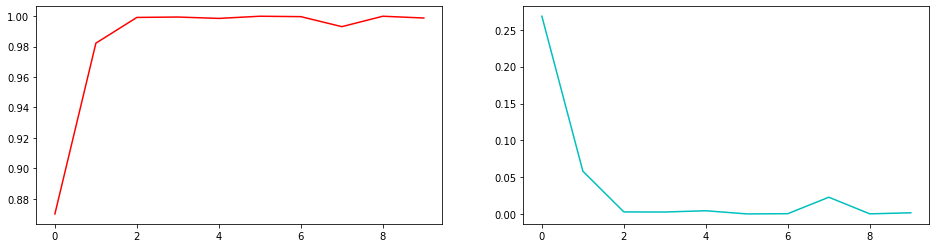

In [74]:
acy = history.history['accuracy']
loss = history.history['loss']
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(acy, c='r')
axes[1].plot(loss, c='c')
plt.show()

#### 测试集进行测试

In [119]:
result10 = model.predict(x_test)

In [120]:
array10 = np.zeros((len(result10), 1))
for i in range(len(result10)):
    array10[i] = np.argmax(result10[i])
array10

array([[0.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [1.]])

In [121]:
num10 = 0
for i in range(len(array10)):
    if array10[i, 0] == y_test[i]:
        num10 += 1
    else:
        print(i)
num10

2382


3316

In [122]:
num10/y_test.shape[0]

0.9996985227615315

In [115]:
p_error = x_test[2382, :, :, 0]

In [116]:
p_error = p_error.reshape(1, 2500)

In [117]:
p_error

array([[0.31152205, 0.31152205, 0.16358464, ..., 0.03129445, 0.16358464,
        0.16358464]])

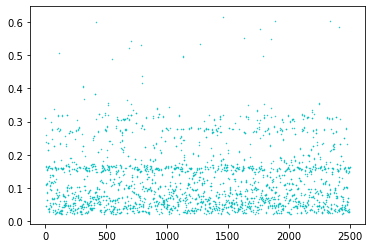

In [118]:
plt.scatter(range(2500), p_error, c='c', s=0.2)
plt.show()

In [126]:
result10[2382], array10[2382], y_test[2382]

(array([1.4005810e-09, 8.0186951e-01, 1.9813016e-01, 3.2746482e-07],
       dtype=float32), array([1.]), 2.0)

### 10  10Cm 模型预测30cm的数据

In [132]:
re = model30.predict(x_test)

In [133]:
array2 = np.zeros((len(re), 1))
for i in range(len(re)):
    array10[i] = np.argmax(re[i])
num2 = 0
for i in range(len(array2)):
    if array2[i, 0] == y_test[i]:
        num2 += 1
    else:
        print(i)
num2

1
2
3
4
5
6
7
8
10
11
12
13
14
15
16
18
19
20
21
23
24
25
26
27
28
29
30
31
32
34
35
37
39
40
41
43
45
46
47
49
50
51
52
53
55
57
58
59
60
63
64
65
67
69
71
73
75
78
79
80
81
82
83
85
86
87
88
89
91
92
93
94
95
96
97
98
100
101
102
104
106
108
109
111
112
113
114
118
121
122
124
125
127
128
129
132
133
134
137
138
140
141
142
143
144
145
147
148
149
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
177
178
179
181
182
184
185
186
187
189
190
191
192
193
194
195
196
198
199
200
201
203
204
206
207
208
209
210
211
212
213
214
215
216
217
218
220
221
222
223
224
225
227
228
229
230
231
232
234
235
237
238
240
241
242
243
244
246
247
248
249
250
251
252
253
254
256
257
259
260
261
262
263
264
266
267
268
270
271
272
273
274
275
277
278
280
281
282
283
284
285
286
287
288
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
312
313
315
317
318
319
321
322
323
324
325
326
327
328
329
331
332
333
334
336
337
338
340


689

In [134]:
num2/x_test.shape[0]

0.2077178173047935

In [3]:
plt.annotate?

In [4]:
a = np.arange(100).reshape(2, 5, 10)

In [5]:
a

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

       [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

In [6]:
np.save('lad.npy', a)

In [7]:
c = np.load('lad.npy')
c

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

       [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

In [8]:
f1 = pd.read_csv('../Cs137data/csv/pulse2525.csv')
f2 = pd.read_csv('../Cs137data/csv/realtime2525.csv')
f3 = pd.read_csv('../Cs137data/csv/pulse_30cm_Set.csv')
f4 = pd.read_csv('../Cs137data/csv/realtime_30cm_Set.csv')

In [15]:
d1 = f1.values
d2 = f2.values
d3 = f3.values
d4 = f4.values

In [16]:
d1.shape, d2.shape, d3.shape, d4.shape

((11135, 2502), (11135, 2501), (1156, 2502), (1156, 2501))

In [17]:
label1 = d1[:, -1]
d1 = d1[:, 1: 2501]
d2 = d2[:, 1: 2501]
label2 = d3[:, -1]
d3 = d3[:, 1: 2501]
d4 = d4[:, 1: 2501]
d1.shape, d2.shape, d3.shape, d4.shape

((11135, 2500), (11135, 2500), (1156, 2500), (1156, 2500))

In [18]:
dataSet1, label1 = nuc.scquential_data_trans_CNN_data(d1, d2, label1)
dataSet2, label2 = nuc.scquential_data_trans_CNN_data(d3, d4, label2)

len(index) = 81
pulse.shape =  (11054, 2500) realtime.shape =  (11054, 2500) dataSet.shape =  (11054, 50, 50, 2)
len(index) = 36
pulse.shape =  (1120, 2500) realtime.shape =  (1120, 2500) dataSet.shape =  (1120, 50, 50, 2)


In [20]:
np.save('../Cs137data/numpy_data/dataSet_10cm.npy', dataSet1)
np.save('../Cs137data/numpy_data/dataSet_30cm.npy', dataSet2)


In [21]:
b1 = np.load('../Cs137data/numpy_data/dataSet_10cm.npy')
b2 = np.load('../Cs137data/numpy_data/dataSet_30cm.npy')
b1.shape, b2.shape

((11054, 50, 50, 2), (1120, 50, 50, 2))

In [22]:
np.save('../Cs137data/numpy_data/label_10cm.npy', label1)
np.save('../Cs137data/numpy_data/label_30cm.npy', label2)

In [23]:
l_10cm = np.load('../Cs137data/numpy_data/label_10cm.npy')
l_30cm = np.load('../Cs137data/numpy_data/label_30cm.npy')
l_10cm.shape, l_30cm.shape

((11054,), (1120,))

### 11 混合数据模型

In [2]:
dataSet10cm = np.load('../Cs137data/numpy_data/dataSet_10cm.npy')
dataSet30cm = np.load('../Cs137data/numpy_data/dataSet_30cm.npy')
dataSet10cm.shape, dataSet30cm.shape

((11054, 50, 50, 2), (1120, 50, 50, 2))

In [3]:
label10cm = np.load('../Cs137data/numpy_data/label_10cm.npy')
label30cm = np.load('../Cs137data/numpy_data/label_30cm.npy')

In [19]:
label30cm = label30cm[:] - 1

In [4]:
dataSet = np.vstack((dataSet10cm, dataSet30cm))

In [6]:
dataSet.shape

(12174, 50, 50, 2)

In [20]:
label = np.vstack((label10cm.reshape(label10cm.shape[0], 1), label30cm.reshape(label30cm.shape[0], 1)))
label.shape

(12174, 1)

In [24]:
dataSet[:, :, :, 0] = dataSet[:, :, :, 0] / np.max(dataSet[:, :, :, 0])
dataSet[:, :, :, 1] = dataSet[:, :, :, 1] / np.max(dataSet[:, :, :, 1])

In [25]:
x_train, y_train, x_test, y_test = nuc.split_dataSet(dataSet, label, test_size=0.4, random_state=42)

x_train.shape= (7304, 50, 50, 2) y_train.shape= (7304, 1) x_test.shape= (4870, 50, 50, 2) y_test.shape= (4870, 1)


In [26]:
model = models.Sequential()  # 线性模型
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])


In [27]:
history = model.fit(x_train, y_train, epochs=10)

Train on 7304 samples
Epoch 1/10
6048/7304 [=======================>......] - ETA: 40s - loss: 1.3928 - accuracy: 0.375 - ETA: 28s - loss: 1.3784 - accuracy: 0.343 - ETA: 24s - loss: 1.3472 - accuracy: 0.395 - ETA: 22s - loss: 1.3197 - accuracy: 0.406 - ETA: 20s - loss: 1.3304 - accuracy: 0.412 - ETA: 20s - loss: 1.3013 - accuracy: 0.416 - ETA: 19s - loss: 1.3052 - accuracy: 0.401 - ETA: 19s - loss: 1.3079 - accuracy: 0.378 - ETA: 18s - loss: 1.2997 - accuracy: 0.371 - ETA: 18s - loss: 1.2808 - accuracy: 0.393 - ETA: 18s - loss: 1.2704 - accuracy: 0.400 - ETA: 18s - loss: 1.2567 - accuracy: 0.408 - ETA: 18s - loss: 1.2485 - accuracy: 0.401 - ETA: 18s - loss: 1.2460 - accuracy: 0.392 - ETA: 17s - loss: 1.2389 - accuracy: 0.400 - ETA: 17s - loss: 1.2259 - accuracy: 0.408 - ETA: 17s - loss: 1.2134 - accuracy: 0.400 - ETA: 17s - loss: 1.1970 - accuracy: 0.413 - ETA: 17s - loss: 1.1881 - accuracy: 0.409 - ETA: 17s - loss: 1.1845 - accuracy: 0.407 - ETA: 17s - loss: 1.1785 - accuracy: 0.406 

6080/7304 [=======================>......] - ETA: 16s - loss: 0.0672 - accuracy: 0.968 - ETA: 16s - loss: 0.0649 - accuracy: 0.968 - ETA: 17s - loss: 0.0620 - accuracy: 0.979 - ETA: 17s - loss: 0.0579 - accuracy: 0.984 - ETA: 17s - loss: 0.0509 - accuracy: 0.987 - ETA: 17s - loss: 0.0445 - accuracy: 0.989 - ETA: 17s - loss: 0.0472 - accuracy: 0.986 - ETA: 17s - loss: 0.0588 - accuracy: 0.984 - ETA: 17s - loss: 0.0712 - accuracy: 0.982 - ETA: 17s - loss: 0.0805 - accuracy: 0.978 - ETA: 17s - loss: 0.0867 - accuracy: 0.974 - ETA: 16s - loss: 0.0822 - accuracy: 0.976 - ETA: 16s - loss: 0.0866 - accuracy: 0.971 - ETA: 16s - loss: 0.0949 - accuracy: 0.966 - ETA: 16s - loss: 0.0984 - accuracy: 0.964 - ETA: 16s - loss: 0.0981 - accuracy: 0.964 - ETA: 16s - loss: 0.0950 - accuracy: 0.966 - ETA: 16s - loss: 0.1099 - accuracy: 0.965 - ETA: 16s - loss: 0.1116 - accuracy: 0.965 - ETA: 16s - loss: 0.1075 - accuracy: 0.967 - ETA: 16s - loss: 0.1063 - accuracy: 0.967 - ETA: 16s - loss: 0.1035 - accur

7304/7304 [==============================] - ETA: 3s - loss: 0.0658 - accuracy: 0.97 - ETA: 2s - loss: 0.0656 - accuracy: 0.97 - ETA: 2s - loss: 0.0652 - accuracy: 0.97 - ETA: 2s - loss: 0.0649 - accuracy: 0.97 - ETA: 2s - loss: 0.0646 - accuracy: 0.97 - ETA: 2s - loss: 0.0647 - accuracy: 0.97 - ETA: 2s - loss: 0.0644 - accuracy: 0.97 - ETA: 2s - loss: 0.0641 - accuracy: 0.97 - ETA: 2s - loss: 0.0638 - accuracy: 0.97 - ETA: 2s - loss: 0.0635 - accuracy: 0.97 - ETA: 2s - loss: 0.0632 - accuracy: 0.97 - ETA: 2s - loss: 0.0629 - accuracy: 0.97 - ETA: 2s - loss: 0.0627 - accuracy: 0.97 - ETA: 1s - loss: 0.0624 - accuracy: 0.97 - ETA: 1s - loss: 0.0621 - accuracy: 0.97 - ETA: 1s - loss: 0.0618 - accuracy: 0.97 - ETA: 1s - loss: 0.0615 - accuracy: 0.97 - ETA: 1s - loss: 0.0613 - accuracy: 0.98 - ETA: 1s - loss: 0.0610 - accuracy: 0.98 - ETA: 1s - loss: 0.0607 - accuracy: 0.98 - ETA: 1s - loss: 0.0605 - accuracy: 0.98 - ETA: 1s - loss: 0.0602 - accuracy: 0.98 - ETA: 1s - loss: 0.0600 - accura

6048/7304 [=======================>......] - ETA: 18s - loss: 0.0060 - accuracy: 1.000 - ETA: 17s - loss: 0.0033 - accuracy: 1.000 - ETA: 17s - loss: 0.0029 - accuracy: 1.000 - ETA: 17s - loss: 0.0025 - accuracy: 1.000 - ETA: 17s - loss: 0.0026 - accuracy: 1.000 - ETA: 17s - loss: 0.0024 - accuracy: 1.000 - ETA: 17s - loss: 0.0023 - accuracy: 1.000 - ETA: 17s - loss: 0.0021 - accuracy: 1.000 - ETA: 17s - loss: 0.0024 - accuracy: 1.000 - ETA: 17s - loss: 0.0023 - accuracy: 1.000 - ETA: 17s - loss: 0.0021 - accuracy: 1.000 - ETA: 16s - loss: 0.0025 - accuracy: 1.000 - ETA: 16s - loss: 0.0024 - accuracy: 1.000 - ETA: 16s - loss: 0.0028 - accuracy: 1.000 - ETA: 16s - loss: 0.0026 - accuracy: 1.000 - ETA: 16s - loss: 0.0026 - accuracy: 1.000 - ETA: 16s - loss: 0.0025 - accuracy: 1.000 - ETA: 16s - loss: 0.0025 - accuracy: 1.000 - ETA: 16s - loss: 0.0025 - accuracy: 1.000 - ETA: 16s - loss: 0.0025 - accuracy: 1.000 - ETA: 16s - loss: 0.0024 - accuracy: 1.000 - ETA: 16s - loss: 0.0024 - accur

7304/7304 [==============================] - ETA: 3s - loss: 0.0029 - accuracy: 0.99 - ETA: 3s - loss: 0.0029 - accuracy: 0.99 - ETA: 2s - loss: 0.0029 - accuracy: 0.99 - ETA: 2s - loss: 0.0029 - accuracy: 0.99 - ETA: 2s - loss: 0.0029 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 2s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0028 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accuracy: 0.99 - ETA: 1s - loss: 0.0027 - accura

5568/7304 [=====================>........] - ETA: 17s - loss: 0.0013 - accuracy: 1.000 - ETA: 18s - loss: 0.0020 - accuracy: 1.000 - ETA: 19s - loss: 0.0015 - accuracy: 1.000 - ETA: 20s - loss: 0.0028 - accuracy: 1.000 - ETA: 19s - loss: 0.0023 - accuracy: 1.000 - ETA: 19s - loss: 0.0020 - accuracy: 1.000 - ETA: 19s - loss: 0.0019 - accuracy: 1.000 - ETA: 18s - loss: 0.0017 - accuracy: 1.000 - ETA: 18s - loss: 0.0016 - accuracy: 1.000 - ETA: 18s - loss: 0.0014 - accuracy: 1.000 - ETA: 18s - loss: 0.0013 - accuracy: 1.000 - ETA: 18s - loss: 0.0013 - accuracy: 1.000 - ETA: 17s - loss: 0.0012 - accuracy: 1.000 - ETA: 17s - loss: 0.0012 - accuracy: 1.000 - ETA: 17s - loss: 0.0011 - accuracy: 1.000 - ETA: 17s - loss: 0.0010 - accuracy: 1.000 - ETA: 17s - loss: 9.8879e-04 - accuracy: 1.000 - ETA: 17s - loss: 9.4432e-04 - accuracy: 1.000 - ETA: 17s - loss: 9.0279e-04 - accuracy: 1.000 - ETA: 17s - loss: 8.6876e-04 - accuracy: 1.000 - ETA: 16s - loss: 8.5362e-04 - accuracy: 1.000 - ETA: 16s - 

7304/7304 [==============================] - ETA: 4s - loss: 6.8369e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.8548e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.8213e-04 - accuracy: 1.00 - ETA: 4s - loss: 6.8002e-04 - accuracy: 1.00 - ETA: 3s - loss: 6.8865e-04 - accuracy: 1.00 - ETA: 3s - loss: 6.8583e-04 - accuracy: 1.00 - ETA: 3s - loss: 6.8244e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.0855e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.0541e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.0231e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.2179e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.1845e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.1486e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.1173e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.0860e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.0882e-04 - accuracy: 1.00 - ETA: 3s - loss: 7.0573e-04 - accuracy: 1.00 - ETA: 2s - loss: 7.0271e-04 - accuracy: 1.00 - ETA: 2s - loss: 7.0112e-04 - accuracy: 1.00 - ETA: 2s - loss: 6.9828e-04 - accuracy: 1.00 - ETA: 2s - loss: 6.9647e-04 - accura

6080/7304 [=======================>......] - ETA: 21s - loss: 0.0020 - accuracy: 1.000 - ETA: 19s - loss: 0.0131 - accuracy: 1.000 - ETA: 19s - loss: 0.0103 - accuracy: 1.000 - ETA: 18s - loss: 0.0105 - accuracy: 1.000 - ETA: 18s - loss: 0.0084 - accuracy: 1.000 - ETA: 18s - loss: 0.0073 - accuracy: 1.000 - ETA: 18s - loss: 0.0066 - accuracy: 1.000 - ETA: 18s - loss: 0.0058 - accuracy: 1.000 - ETA: 18s - loss: 0.0054 - accuracy: 1.000 - ETA: 17s - loss: 0.0109 - accuracy: 0.996 - ETA: 17s - loss: 0.0109 - accuracy: 0.997 - ETA: 17s - loss: 0.0101 - accuracy: 0.997 - ETA: 17s - loss: 0.0093 - accuracy: 0.997 - ETA: 17s - loss: 0.0087 - accuracy: 0.997 - ETA: 17s - loss: 0.0082 - accuracy: 0.997 - ETA: 17s - loss: 0.0081 - accuracy: 0.998 - ETA: 17s - loss: 0.0197 - accuracy: 0.996 - ETA: 17s - loss: 0.0186 - accuracy: 0.996 - ETA: 16s - loss: 0.0177 - accuracy: 0.996 - ETA: 16s - loss: 0.0168 - accuracy: 0.996 - ETA: 16s - loss: 0.0161 - accuracy: 0.997 - ETA: 16s - loss: 0.0153 - accur

7304/7304 [==============================] - ETA: 3s - loss: 0.0188 - accuracy: 0.99 - ETA: 2s - loss: 0.0187 - accuracy: 0.99 - ETA: 2s - loss: 0.0186 - accuracy: 0.99 - ETA: 2s - loss: 0.0185 - accuracy: 0.99 - ETA: 2s - loss: 0.0184 - accuracy: 0.99 - ETA: 2s - loss: 0.0183 - accuracy: 0.99 - ETA: 2s - loss: 0.0182 - accuracy: 0.99 - ETA: 2s - loss: 0.0182 - accuracy: 0.99 - ETA: 2s - loss: 0.0181 - accuracy: 0.99 - ETA: 2s - loss: 0.0180 - accuracy: 0.99 - ETA: 2s - loss: 0.0179 - accuracy: 0.99 - ETA: 2s - loss: 0.0178 - accuracy: 0.99 - ETA: 2s - loss: 0.0177 - accuracy: 0.99 - ETA: 1s - loss: 0.0176 - accuracy: 0.99 - ETA: 1s - loss: 0.0175 - accuracy: 0.99 - ETA: 1s - loss: 0.0175 - accuracy: 0.99 - ETA: 1s - loss: 0.0174 - accuracy: 0.99 - ETA: 1s - loss: 0.0173 - accuracy: 0.99 - ETA: 1s - loss: 0.0172 - accuracy: 0.99 - ETA: 1s - loss: 0.0171 - accuracy: 0.99 - ETA: 1s - loss: 0.0171 - accuracy: 0.99 - ETA: 1s - loss: 0.0170 - accuracy: 0.99 - ETA: 1s - loss: 0.0169 - accura

5824/7304 [======================>.......] - ETA: 17s - loss: 9.4138e-05 - accuracy: 1.000 - ETA: 17s - loss: 1.2669e-04 - accuracy: 1.000 - ETA: 17s - loss: 1.9391e-04 - accuracy: 1.000 - ETA: 17s - loss: 1.8592e-04 - accuracy: 1.000 - ETA: 19s - loss: 2.1784e-04 - accuracy: 1.000 - ETA: 19s - loss: 1.9624e-04 - accuracy: 1.000 - ETA: 19s - loss: 1.7708e-04 - accuracy: 1.000 - ETA: 18s - loss: 3.0652e-04 - accuracy: 1.000 - ETA: 18s - loss: 2.8710e-04 - accuracy: 1.000 - ETA: 18s - loss: 2.8947e-04 - accuracy: 1.000 - ETA: 17s - loss: 2.7173e-04 - accuracy: 1.000 - ETA: 17s - loss: 0.0034 - accuracy: 0.9974    - ETA: 17s - loss: 0.0032 - accuracy: 0.997 - ETA: 17s - loss: 0.0045 - accuracy: 0.997 - ETA: 17s - loss: 0.0051 - accuracy: 0.997 - ETA: 17s - loss: 0.0048 - accuracy: 0.998 - ETA: 17s - loss: 0.0045 - accuracy: 0.998 - ETA: 17s - loss: 0.0046 - accuracy: 0.998 - ETA: 16s - loss: 0.0044 - accuracy: 0.998 - ETA: 16s - loss: 0.0042 - accuracy: 0.998 - ETA: 16s - loss: 0.0040 - a

7304/7304 [==============================] - ETA: 3s - loss: 6.8820e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.8549e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.8221e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.7913e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.7594e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.7270e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.7046e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.6753e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.6421e-04 - accuracy: 0.99 - ETA: 3s - loss: 6.6107e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.5820e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.5504e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.5189e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.4902e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.4647e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.4392e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.4088e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.3816e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.3523e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.3235e-04 - accuracy: 0.99 - ETA: 2s - loss: 6.2955e-04 - accura

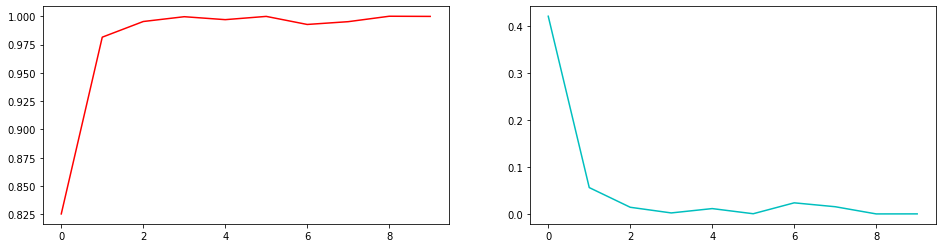

In [28]:
acy = history.history['accuracy']
loss = history.history['loss']
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
axes[0].plot(acy, c='r')
axes[1].plot(loss, c='c')
plt.show()

In [40]:
def predict_accuracy(model, x_test, y_test):
    error_index = []
    num = 0
    result = model.predict(x_test)
    array = np.zeros((len(result), 1))
    for i in range(len(result)):
        array[i] = np.argmax(result[i])
    
    for i in range(len(array)):
        if array[i, 0] == y_test[i, 0]:
            num += 1
        else:
            error_index.append(i)
    accuracy = num / y_test.shape[0]
    print('accuracy = %d' % accuracy)

    return result, error_index, accuracy

accuracy = 0


In [36]:
result = model.predict(x_test)

In [37]:
array = np.zeros((len(result), 1))
for i in range(len(result)):
    array[i] = np.argmax(result[i])

In [44]:
num = 0
index = []
for i in range(len(array)):
    if array[i, 0] == y_test[i, 0]:
        num += 1
    else:
        index.append(i)
num, index

(4869, [1377])

In [42]:
num/y_test.shape[0]

0.999794661190965

In [46]:
y_test.shape

(4870, 1)

In [54]:
70000 / 482019 * 2500 

363.05622807399703

In [49]:
b1 = np.load('../Cs137data/numpy_data/dataSet_10cm.npy')
b1.shape

(11054, 50, 50, 2)

In [50]:
b1[0, :, :, 1]

array([[3.010000e-01, 4.852000e-01, 5.122000e-01, ..., 5.994400e+00,
        6.148000e+00, 6.174200e+00],
       [6.286400e+00, 6.312800e+00, 6.465600e+00, ..., 1.320400e+01,
        1.323040e+01, 1.335900e+01],
       [1.343620e+01, 1.346380e+01, 1.482380e+01, ..., 2.069580e+01,
        2.072240e+01, 2.111000e+01],
       ...,
       [3.103062e+02, 3.103510e+02, 3.103792e+02, ..., 3.144936e+02,
        3.145890e+02, 3.146154e+02],
       [3.153688e+02, 3.153954e+02, 3.154526e+02, ..., 3.200272e+02,
        3.200538e+02, 3.204476e+02],
       [3.204732e+02, 3.210278e+02, 3.212496e+02, ..., 3.276336e+02,
        3.276564e+02, 3.276778e+02]])

In [55]:
b2  = np.load('../Cs137data/numpy_data/dataSet_30cm.npy')
b2.shape

(1120, 50, 50, 2)

In [56]:
b2[0, :, :, 1]

array([[2.5460000e-01, 2.9140000e-01, 1.3902000e+00, ..., 5.1205800e+01,
        5.1612000e+01, 5.1692800e+01],
       [5.1931400e+01, 5.2076600e+01, 5.2301000e+01, ..., 8.4779200e+01,
        8.4884800e+01, 8.5520200e+01],
       [8.6816000e+01, 8.7011600e+01, 8.7054000e+01, ..., 1.3390560e+02,
        1.3401580e+02, 1.3407880e+02],
       ...,
       [1.9110028e+03, 1.9113446e+03, 1.9115350e+03, ..., 1.9404116e+03,
        1.9406580e+03, 1.9411774e+03],
       [1.9412942e+03, 1.9414162e+03, 1.9417120e+03, ..., 1.9788294e+03,
        1.9804088e+03, 1.9804920e+03],
       [1.9811154e+03, 1.9814086e+03, 1.9814536e+03, ..., 2.0243008e+03,
        2.0252366e+03, 2.0271748e+03]])